In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

### データの加工
# 最大値で割る
max_displacement = size_x_data2.max()
size_x_data1 = size_x_data1/max_displacement
size_x_data2 = size_x_data2/max_displacement
size_x_data3 = size_x_data3/max_displacement
position_x_data1 = position_x_data1/max_displacement
position_x_data2 = position_x_data2/max_displacement
position_x_data3 = position_x_data3/max_displacement
position_one_data1 = position_one_data1/max_displacement
position_one_data2 = position_one_data2/max_displacement
position_one_data3 = position_one_data3/max_displacement
position_two_data1 = position_two_data1/max_displacement
position_two_data2 = position_two_data2/max_displacement
position_two_data3 = position_two_data3/max_displacement
position_three_data1 = position_three_data1/max_displacement
position_three_data2 = position_three_data2/max_displacement
position_three_data3 = position_three_data3/max_displacement
position_four_data1 = position_four_data1/max_displacement
position_four_data2 = position_four_data2/max_displacement
position_four_data3 = position_four_data3/max_displacement
position_five_data1 = position_five_data1/max_displacement
position_five_data2 = position_five_data2/max_displacement
position_five_data3 = position_five_data3/max_displacement

# 実験2:差をとると精度が向上するか
# size_x_data = (size_x_data-no_hole_data)
# position_x_data = (position_x_data-no_hole_data)

# position_one_data = (position_one_data-no_hole_data)
# position_two_data = (position_two_data-no_hole_data)
# position_three_data = (position_three_data-no_hole_data)
# position_four_data = (position_four_data-no_hole_data)
# position_five_data = (position_five_data-no_hole_data)
position_y_data = position_y_data/50

### train用とtest用に分割(9:1)
size_x_train1, size_x_test1, size_x_train2, size_x_test2, size_x_train3, size_x_test3, size_y_train, size_y_test = train_test_split(size_x_data1, size_x_data2, size_x_data3, size_y_data, test_size=0.10)
position_x_train1, position_x_test1, position_x_train2, position_x_test2, position_x_train3, position_x_test3, position_y_train, position_y_test = train_test_split(position_x_data1, position_x_data2, position_x_data3, position_y_data, test_size=0.10)


In [3]:
print(size_x_train1.shape)
print(size_x_test1.shape)
print(position_five_data1.shape)
print(position_four_data1.shape)
print(position_three_data1.shape)
print(position_two_data1.shape)
print(position_one_data1.shape)
print(484+529+529+576+576)

(2424, 1251)
(270, 1251)
(484, 1251)
(529, 1251)
(529, 1251)
(576, 1251)
(576, 1251)
2694


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            1252        input_1[0][0]                    
____________________________________________________________________________________________

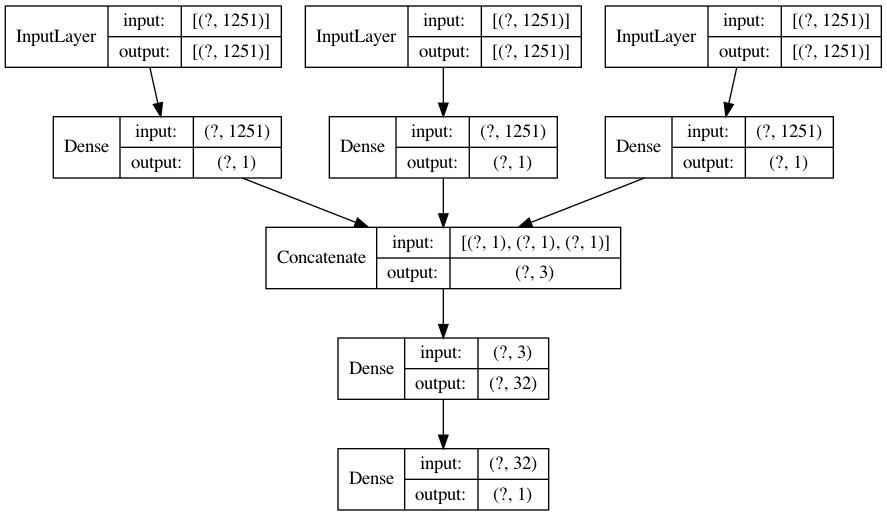

In [4]:
#単純モデル
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,))
input2 = Input(shape=(1251,))
input3 = Input(shape=(1251,))

# 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Dense(1, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Dense(1, activation="linear")(input3)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
w = Dense(32, activation="tanh")(combined)
w = Dense(1, activation="linear")(w)

# モデル定義とコンパイル
model = Model(inputs=[x.input, y.input, z.input], outputs=w)
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.summary()
plot_model(model, show_shapes=True, show_layer_names=False)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1251, 32)     128         input_4[0][0]                    
____________________________________________________________________________________________

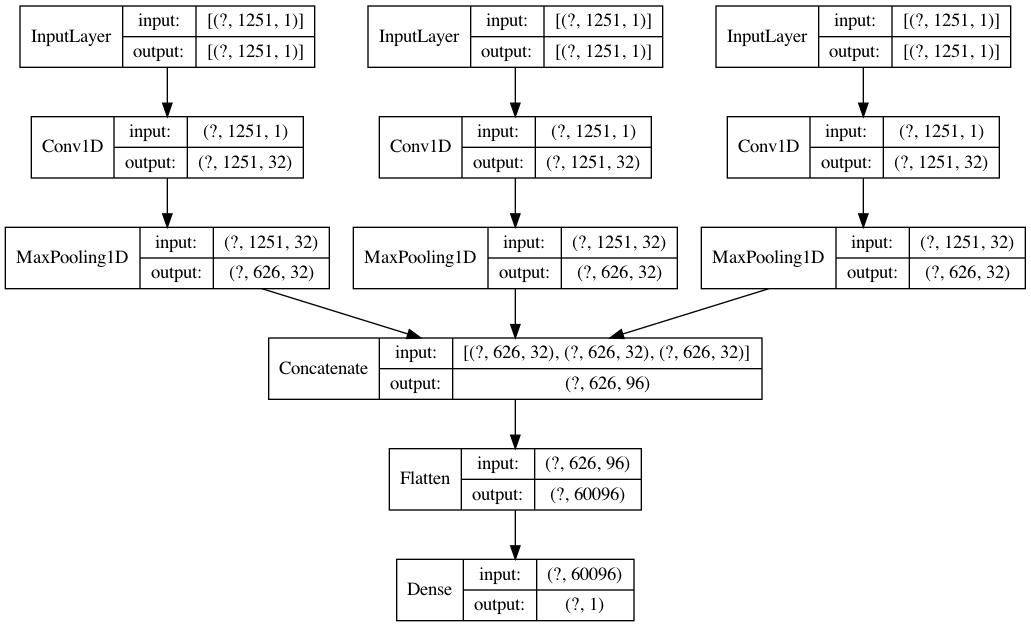

In [5]:
# CNNモデルで大きさ推定
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,1))
input2 = Input(shape=(1251,1))
input3 = Input(shape=(1251,1))

# 入力1から結合前まで
x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
x = MaxPooling1D(2, padding='same')(x)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
y = MaxPooling1D(2, padding='same')(y)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
z = MaxPooling1D(2, padding='same')(z)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
cnn = Flatten()(combined)
cnn = Dense(1, activation="relu")(cnn)

# モデル定義とコンパイル
cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
cnn_size_model.summary()
plot_model(cnn_size_model, show_shapes=True, show_layer_names=False)

In [6]:
size_history = cnn_size_model.fit([size_x_train1, size_x_train2, size_x_train3], size_y_train, epochs=10000, validation_data=([size_x_test1,size_x_test2,size_x_test3], size_y_test))

Epoch 1/10000
76/76 [==============================] - 3s 42ms/step - loss: 2.4453 - acc: 0.2063 - val_loss: 2.0402 - val_acc: 0.2444
Epoch 2/10000
76/76 [==============================] - 3s 42ms/step - loss: 1.9473 - acc: 0.2104 - val_loss: 2.0120 - val_acc: 0.2444
Epoch 3/10000
76/76 [==============================] - 3s 42ms/step - loss: 1.8989 - acc: 0.2104 - val_loss: 2.0878 - val_acc: 0.2444
Epoch 4/10000
76/76 [==============================] - 3s 39ms/step - loss: 1.8527 - acc: 0.2104 - val_loss: 1.9831 - val_acc: 0.2444
Epoch 5/10000
76/76 [==============================] - 3s 38ms/step - loss: 1.8000 - acc: 0.2104 - val_loss: 1.9417 - val_acc: 0.2444
Epoch 6/10000
76/76 [==============================] - 3s 39ms/step - loss: 1.7978 - acc: 0.2104 - val_loss: 1.8851 - val_acc: 0.2444
Epoch 7/10000
76/76 [==============================] - 3s 39ms/step - loss: 1.7167 - acc: 0.2104 - val_loss: 1.8483 - val_acc: 0.2444
Epoch 8/10000
76/76 [==============================] - 4s 51ms

Epoch 62/10000
76/76 [==============================] - 4s 56ms/step - loss: 0.9775 - acc: 0.2104 - val_loss: 1.1066 - val_acc: 0.2444
Epoch 63/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.9256 - acc: 0.2104 - val_loss: 1.1000 - val_acc: 0.2444
Epoch 64/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.9664 - acc: 0.2104 - val_loss: 1.4020 - val_acc: 0.2444
Epoch 65/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.9834 - acc: 0.2104 - val_loss: 1.0416 - val_acc: 0.2444
Epoch 66/10000
76/76 [==============================] - 4s 55ms/step - loss: 0.9416 - acc: 0.2104 - val_loss: 1.0987 - val_acc: 0.2444
Epoch 67/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.9181 - acc: 0.2104 - val_loss: 1.0618 - val_acc: 0.2444
Epoch 68/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.8944 - acc: 0.2104 - val_loss: 1.0808 - val_acc: 0.2444
Epoch 69/10000
76/76 [==============================] -

76/76 [==============================] - 3s 34ms/step - loss: 0.7045 - acc: 0.2096 - val_loss: 0.7577 - val_acc: 0.2444
Epoch 123/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.7049 - acc: 0.2096 - val_loss: 0.7533 - val_acc: 0.2444
Epoch 124/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.6711 - acc: 0.2092 - val_loss: 0.8016 - val_acc: 0.2444
Epoch 125/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.6884 - acc: 0.2092 - val_loss: 0.7576 - val_acc: 0.2444
Epoch 126/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.6730 - acc: 0.2092 - val_loss: 0.7299 - val_acc: 0.2444
Epoch 127/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.6632 - acc: 0.2096 - val_loss: 0.7576 - val_acc: 0.2444
Epoch 128/10000
76/76 [==============================] - 5s 61ms/step - loss: 0.6936 - acc: 0.2096 - val_loss: 0.7513 - val_acc: 0.2444
Epoch 129/10000
76/76 [==============================] - 4s 58ms

76/76 [==============================] - 4s 54ms/step - loss: 0.6033 - acc: 0.2083 - val_loss: 0.7182 - val_acc: 0.2444
Epoch 183/10000
76/76 [==============================] - 4s 51ms/step - loss: 0.6560 - acc: 0.2083 - val_loss: 0.8133 - val_acc: 0.2407
Epoch 184/10000
76/76 [==============================] - 4s 50ms/step - loss: 0.6327 - acc: 0.2092 - val_loss: 0.7413 - val_acc: 0.2444
Epoch 185/10000
76/76 [==============================] - 4s 52ms/step - loss: 0.6186 - acc: 0.2075 - val_loss: 0.7985 - val_acc: 0.2407
Epoch 186/10000
76/76 [==============================] - 4s 49ms/step - loss: 0.6611 - acc: 0.2079 - val_loss: 0.6959 - val_acc: 0.2444
Epoch 187/10000
76/76 [==============================] - 4s 54ms/step - loss: 0.7017 - acc: 0.2079 - val_loss: 0.8795 - val_acc: 0.2407
Epoch 188/10000
76/76 [==============================] - 4s 49ms/step - loss: 0.6225 - acc: 0.2087 - val_loss: 0.7737 - val_acc: 0.2444
Epoch 189/10000
76/76 [==============================] - 4s 50ms

76/76 [==============================] - 4s 53ms/step - loss: 0.5717 - acc: 0.2079 - val_loss: 0.6742 - val_acc: 0.2444
Epoch 243/10000
76/76 [==============================] - 4s 49ms/step - loss: 0.6000 - acc: 0.2079 - val_loss: 0.6513 - val_acc: 0.2444
Epoch 244/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.5615 - acc: 0.2075 - val_loss: 0.6507 - val_acc: 0.2444
Epoch 245/10000
76/76 [==============================] - 4s 49ms/step - loss: 0.5595 - acc: 0.2079 - val_loss: 0.6500 - val_acc: 0.2444
Epoch 246/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.5862 - acc: 0.2079 - val_loss: 0.7708 - val_acc: 0.2407
Epoch 247/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.6003 - acc: 0.2067 - val_loss: 0.7431 - val_acc: 0.2444
Epoch 248/10000
76/76 [==============================] - 4s 55ms/step - loss: 0.6244 - acc: 0.2079 - val_loss: 0.6671 - val_acc: 0.2444
Epoch 249/10000
76/76 [==============================] - 4s 55ms

76/76 [==============================] - 4s 56ms/step - loss: 0.5728 - acc: 0.2071 - val_loss: 0.6190 - val_acc: 0.2444
Epoch 303/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.6196 - acc: 0.2067 - val_loss: 0.7197 - val_acc: 0.2407
Epoch 304/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.5401 - acc: 0.2071 - val_loss: 0.6544 - val_acc: 0.2444
Epoch 305/10000
76/76 [==============================] - 4s 50ms/step - loss: 0.5449 - acc: 0.2075 - val_loss: 0.5985 - val_acc: 0.2444
Epoch 306/10000
76/76 [==============================] - 3s 44ms/step - loss: 0.5311 - acc: 0.2071 - val_loss: 0.5952 - val_acc: 0.2444
Epoch 307/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.5640 - acc: 0.2059 - val_loss: 0.6558 - val_acc: 0.2444
Epoch 308/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.5776 - acc: 0.2067 - val_loss: 0.9154 - val_acc: 0.2444
Epoch 309/10000
76/76 [==============================] - 4s 46ms

76/76 [==============================] - 4s 54ms/step - loss: 0.5549 - acc: 0.2063 - val_loss: 0.6240 - val_acc: 0.2444
Epoch 363/10000
76/76 [==============================] - 4s 51ms/step - loss: 0.5137 - acc: 0.2079 - val_loss: 0.5837 - val_acc: 0.2444
Epoch 364/10000
76/76 [==============================] - 4s 55ms/step - loss: 0.6175 - acc: 0.2075 - val_loss: 0.7324 - val_acc: 0.2444
Epoch 365/10000
76/76 [==============================] - 4s 46ms/step - loss: 0.5766 - acc: 0.2079 - val_loss: 0.5997 - val_acc: 0.2444
Epoch 366/10000
76/76 [==============================] - 4s 51ms/step - loss: 0.5319 - acc: 0.2075 - val_loss: 0.5927 - val_acc: 0.2444
Epoch 367/10000
76/76 [==============================] - 4s 55ms/step - loss: 0.5646 - acc: 0.2071 - val_loss: 0.5813 - val_acc: 0.2444
Epoch 368/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.5406 - acc: 0.2067 - val_loss: 0.6559 - val_acc: 0.2444
Epoch 369/10000
76/76 [==============================] - 4s 51ms

76/76 [==============================] - 3s 39ms/step - loss: 0.4918 - acc: 0.2067 - val_loss: 0.6964 - val_acc: 0.2444
Epoch 423/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.5357 - acc: 0.2063 - val_loss: 0.5883 - val_acc: 0.2444
Epoch 424/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.5413 - acc: 0.2079 - val_loss: 0.6096 - val_acc: 0.2444
Epoch 425/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5080 - acc: 0.2067 - val_loss: 0.7571 - val_acc: 0.2407
Epoch 426/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5277 - acc: 0.2071 - val_loss: 0.5885 - val_acc: 0.2444
Epoch 427/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5186 - acc: 0.2075 - val_loss: 0.5874 - val_acc: 0.2444
Epoch 428/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4996 - acc: 0.2075 - val_loss: 0.6177 - val_acc: 0.2444
Epoch 429/10000
76/76 [==============================] - 3s 36ms

76/76 [==============================] - 3s 36ms/step - loss: 0.4845 - acc: 0.2075 - val_loss: 0.6419 - val_acc: 0.2444
Epoch 483/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5348 - acc: 0.2071 - val_loss: 0.7041 - val_acc: 0.2444
Epoch 484/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4949 - acc: 0.2075 - val_loss: 0.9522 - val_acc: 0.2444
Epoch 485/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4957 - acc: 0.2071 - val_loss: 0.5700 - val_acc: 0.2444
Epoch 486/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5052 - acc: 0.2075 - val_loss: 0.6493 - val_acc: 0.2444
Epoch 487/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5070 - acc: 0.2067 - val_loss: 0.5861 - val_acc: 0.2444
Epoch 488/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5026 - acc: 0.2075 - val_loss: 0.5652 - val_acc: 0.2444
Epoch 489/10000
76/76 [==============================] - 3s 37ms

76/76 [==============================] - 3s 36ms/step - loss: 0.5160 - acc: 0.2075 - val_loss: 0.5955 - val_acc: 0.2444
Epoch 543/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4888 - acc: 0.2075 - val_loss: 0.5950 - val_acc: 0.2444
Epoch 544/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4945 - acc: 0.2075 - val_loss: 0.5628 - val_acc: 0.2444
Epoch 545/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4843 - acc: 0.2071 - val_loss: 0.7487 - val_acc: 0.2407
Epoch 546/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.4802 - acc: 0.2071 - val_loss: 0.5546 - val_acc: 0.2444
Epoch 547/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.5064 - acc: 0.2067 - val_loss: 0.5745 - val_acc: 0.2444
Epoch 548/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.5064 - acc: 0.2063 - val_loss: 0.5913 - val_acc: 0.2444
Epoch 549/10000
76/76 [==============================] - 3s 36ms

76/76 [==============================] - 3s 35ms/step - loss: 0.4822 - acc: 0.2071 - val_loss: 0.5593 - val_acc: 0.2444
Epoch 603/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.5065 - acc: 0.2063 - val_loss: 0.5870 - val_acc: 0.2444
Epoch 604/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5292 - acc: 0.2079 - val_loss: 0.5472 - val_acc: 0.2444
Epoch 605/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4861 - acc: 0.2075 - val_loss: 0.5967 - val_acc: 0.2444
Epoch 606/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5297 - acc: 0.2075 - val_loss: 0.5806 - val_acc: 0.2444
Epoch 607/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4972 - acc: 0.2075 - val_loss: 0.5699 - val_acc: 0.2444
Epoch 608/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4800 - acc: 0.2071 - val_loss: 0.5620 - val_acc: 0.2444
Epoch 609/10000
76/76 [==============================] - 3s 34ms

76/76 [==============================] - 3s 35ms/step - loss: 0.5303 - acc: 0.2079 - val_loss: 0.5935 - val_acc: 0.2407
Epoch 663/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.5496 - acc: 0.2063 - val_loss: 0.6057 - val_acc: 0.2407
Epoch 664/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5470 - acc: 0.2063 - val_loss: 0.7856 - val_acc: 0.2407
Epoch 665/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5211 - acc: 0.2075 - val_loss: 0.6961 - val_acc: 0.2444
Epoch 666/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5143 - acc: 0.2075 - val_loss: 0.5603 - val_acc: 0.2444
Epoch 667/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4884 - acc: 0.2075 - val_loss: 0.5788 - val_acc: 0.2444
Epoch 668/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4542 - acc: 0.2079 - val_loss: 0.5682 - val_acc: 0.2444
Epoch 669/10000
76/76 [==============================] - 3s 35ms

76/76 [==============================] - 3s 35ms/step - loss: 0.4950 - acc: 0.2071 - val_loss: 0.5322 - val_acc: 0.2444
Epoch 723/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4714 - acc: 0.2075 - val_loss: 0.5341 - val_acc: 0.2444
Epoch 724/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4843 - acc: 0.2067 - val_loss: 0.5367 - val_acc: 0.2444
Epoch 725/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4697 - acc: 0.2071 - val_loss: 0.5312 - val_acc: 0.2444
Epoch 726/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4763 - acc: 0.2071 - val_loss: 0.5548 - val_acc: 0.2444
Epoch 727/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5002 - acc: 0.2075 - val_loss: 0.5295 - val_acc: 0.2444
Epoch 728/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4841 - acc: 0.2071 - val_loss: 0.5300 - val_acc: 0.2444
Epoch 729/10000
76/76 [==============================] - 3s 35ms

76/76 [==============================] - 3s 35ms/step - loss: 0.4693 - acc: 0.2071 - val_loss: 0.5222 - val_acc: 0.2444
Epoch 783/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4832 - acc: 0.2075 - val_loss: 0.5697 - val_acc: 0.2444
Epoch 784/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4681 - acc: 0.2075 - val_loss: 0.5634 - val_acc: 0.2444
Epoch 785/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5191 - acc: 0.2075 - val_loss: 0.6625 - val_acc: 0.2444
Epoch 786/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4623 - acc: 0.2079 - val_loss: 0.5484 - val_acc: 0.2444
Epoch 787/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4851 - acc: 0.2071 - val_loss: 0.6627 - val_acc: 0.2407
Epoch 788/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5016 - acc: 0.2071 - val_loss: 0.6864 - val_acc: 0.2444
Epoch 789/10000
76/76 [==============================] - 3s 35ms

76/76 [==============================] - 3s 36ms/step - loss: 0.4839 - acc: 0.2079 - val_loss: 0.5417 - val_acc: 0.2444
Epoch 843/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4712 - acc: 0.2071 - val_loss: 0.5287 - val_acc: 0.2444
Epoch 844/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4507 - acc: 0.2079 - val_loss: 0.5368 - val_acc: 0.2444
Epoch 845/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4452 - acc: 0.2075 - val_loss: 0.5296 - val_acc: 0.2444
Epoch 846/10000
76/76 [==============================] - ETA: 0s - loss: 0.4977 - acc: 0.207 - 3s 35ms/step - loss: 0.4947 - acc: 0.2067 - val_loss: 0.5422 - val_acc: 0.2444
Epoch 847/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4620 - acc: 0.2071 - val_loss: 0.5249 - val_acc: 0.2444
Epoch 848/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4876 - acc: 0.2075 - val_loss: 0.5402 - val_acc: 0.2407
Epoch 849/10000
76/76 [===

76/76 [==============================] - 2s 32ms/step - loss: 0.4670 - acc: 0.2079 - val_loss: 0.5278 - val_acc: 0.2407
Epoch 903/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4687 - acc: 0.2079 - val_loss: 0.5268 - val_acc: 0.2407
Epoch 904/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4514 - acc: 0.2075 - val_loss: 0.5888 - val_acc: 0.2444
Epoch 905/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4894 - acc: 0.2079 - val_loss: 0.5207 - val_acc: 0.2444
Epoch 906/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4734 - acc: 0.2079 - val_loss: 0.5928 - val_acc: 0.2407
Epoch 907/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4823 - acc: 0.2075 - val_loss: 0.7615 - val_acc: 0.2444
Epoch 908/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4940 - acc: 0.2071 - val_loss: 0.5315 - val_acc: 0.2407
Epoch 909/10000
76/76 [==============================] - 2s 32ms

76/76 [==============================] - 3s 34ms/step - loss: 0.4633 - acc: 0.2075 - val_loss: 0.5215 - val_acc: 0.2407
Epoch 963/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4765 - acc: 0.2075 - val_loss: 0.5244 - val_acc: 0.2444
Epoch 964/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4496 - acc: 0.2071 - val_loss: 0.4890 - val_acc: 0.2444
Epoch 965/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4571 - acc: 0.2071 - val_loss: 0.5472 - val_acc: 0.2444
Epoch 966/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4700 - acc: 0.2067 - val_loss: 0.5117 - val_acc: 0.2444
Epoch 967/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4654 - acc: 0.2079 - val_loss: 0.5564 - val_acc: 0.2407
Epoch 968/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4632 - acc: 0.2067 - val_loss: 0.7325 - val_acc: 0.2407
Epoch 969/10000
76/76 [==============================] - 2s 32ms

76/76 [==============================] - 2s 32ms/step - loss: 0.4483 - acc: 0.2079 - val_loss: 0.5243 - val_acc: 0.2407
Epoch 1023/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4450 - acc: 0.2071 - val_loss: 0.5578 - val_acc: 0.2444
Epoch 1024/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4717 - acc: 0.2079 - val_loss: 0.5166 - val_acc: 0.2444
Epoch 1025/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4605 - acc: 0.2067 - val_loss: 0.5116 - val_acc: 0.2444
Epoch 1026/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4354 - acc: 0.2079 - val_loss: 0.5170 - val_acc: 0.2444
Epoch 1027/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4526 - acc: 0.2071 - val_loss: 0.6002 - val_acc: 0.2444
Epoch 1028/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4829 - acc: 0.2067 - val_loss: 0.5084 - val_acc: 0.2444
Epoch 1029/10000
76/76 [==============================] - 

Epoch 1082/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4538 - acc: 0.2075 - val_loss: 0.6626 - val_acc: 0.2444
Epoch 1083/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4717 - acc: 0.2067 - val_loss: 0.5257 - val_acc: 0.2444
Epoch 1084/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4743 - acc: 0.2079 - val_loss: 0.5111 - val_acc: 0.2444
Epoch 1085/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4538 - acc: 0.2071 - val_loss: 0.5197 - val_acc: 0.2444
Epoch 1086/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4808 - acc: 0.2075 - val_loss: 0.5556 - val_acc: 0.2407
Epoch 1087/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4482 - acc: 0.2079 - val_loss: 0.6418 - val_acc: 0.2407
Epoch 1088/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4334 - acc: 0.2071 - val_loss: 0.5542 - val_acc: 0.2407
Epoch 1089/10000
76/76 [=================

Epoch 1142/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4582 - acc: 0.2075 - val_loss: 0.5669 - val_acc: 0.2444
Epoch 1143/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4366 - acc: 0.2079 - val_loss: 0.5159 - val_acc: 0.2444
Epoch 1144/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4348 - acc: 0.2075 - val_loss: 0.7665 - val_acc: 0.2444
Epoch 1145/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4630 - acc: 0.2075 - val_loss: 0.5205 - val_acc: 0.2444
Epoch 1146/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4535 - acc: 0.2071 - val_loss: 0.5072 - val_acc: 0.2407
Epoch 1147/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4554 - acc: 0.2075 - val_loss: 0.5873 - val_acc: 0.2407
Epoch 1148/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4408 - acc: 0.2075 - val_loss: 0.5116 - val_acc: 0.2444
Epoch 1149/10000
76/76 [=================

Epoch 1202/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4447 - acc: 0.2079 - val_loss: 0.4912 - val_acc: 0.2407
Epoch 1203/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4547 - acc: 0.2075 - val_loss: 0.5004 - val_acc: 0.2444
Epoch 1204/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4813 - acc: 0.2075 - val_loss: 0.7216 - val_acc: 0.2407
Epoch 1205/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4485 - acc: 0.2071 - val_loss: 0.5031 - val_acc: 0.2407
Epoch 1206/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4475 - acc: 0.2071 - val_loss: 0.5106 - val_acc: 0.2407
Epoch 1207/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4972 - acc: 0.2071 - val_loss: 0.5143 - val_acc: 0.2444
Epoch 1208/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4828 - acc: 0.2067 - val_loss: 0.7070 - val_acc: 0.2444
Epoch 1209/10000
76/76 [=================

Epoch 1262/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4316 - acc: 0.2075 - val_loss: 0.4993 - val_acc: 0.2444
Epoch 1263/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4494 - acc: 0.2079 - val_loss: 0.4859 - val_acc: 0.2407
Epoch 1264/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4267 - acc: 0.2075 - val_loss: 0.5207 - val_acc: 0.2407
Epoch 1265/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4573 - acc: 0.2075 - val_loss: 0.5023 - val_acc: 0.2407
Epoch 1266/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4462 - acc: 0.2079 - val_loss: 0.6627 - val_acc: 0.2407
Epoch 1267/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4661 - acc: 0.2071 - val_loss: 0.4995 - val_acc: 0.2407
Epoch 1268/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4662 - acc: 0.2075 - val_loss: 0.5240 - val_acc: 0.2407
Epoch 1269/10000
76/76 [=================

Epoch 1322/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4268 - acc: 0.2079 - val_loss: 0.5096 - val_acc: 0.2407
Epoch 1323/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4260 - acc: 0.2079 - val_loss: 0.5410 - val_acc: 0.2444
Epoch 1324/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4528 - acc: 0.2075 - val_loss: 0.5072 - val_acc: 0.2407
Epoch 1325/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4733 - acc: 0.2075 - val_loss: 0.6087 - val_acc: 0.2407
Epoch 1326/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4413 - acc: 0.2071 - val_loss: 0.5155 - val_acc: 0.2407
Epoch 1327/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4268 - acc: 0.2079 - val_loss: 0.5097 - val_acc: 0.2407
Epoch 1328/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4335 - acc: 0.2079 - val_loss: 0.4908 - val_acc: 0.2444
Epoch 1329/10000
76/76 [=================

Epoch 1382/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4752 - acc: 0.2067 - val_loss: 0.4998 - val_acc: 0.2407
Epoch 1383/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.5023 - acc: 0.2067 - val_loss: 0.4992 - val_acc: 0.2407
Epoch 1384/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4318 - acc: 0.2075 - val_loss: 0.4802 - val_acc: 0.2407
Epoch 1385/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4538 - acc: 0.2075 - val_loss: 0.5931 - val_acc: 0.2407
Epoch 1386/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4595 - acc: 0.2075 - val_loss: 0.5120 - val_acc: 0.2444
Epoch 1387/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4550 - acc: 0.2071 - val_loss: 0.5028 - val_acc: 0.2444
Epoch 1388/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4574 - acc: 0.2075 - val_loss: 0.5005 - val_acc: 0.2407
Epoch 1389/10000
76/76 [=================

Epoch 1442/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4223 - acc: 0.2079 - val_loss: 0.5015 - val_acc: 0.2407
Epoch 1443/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4615 - acc: 0.2075 - val_loss: 0.5275 - val_acc: 0.2407
Epoch 1444/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4378 - acc: 0.2071 - val_loss: 0.5161 - val_acc: 0.2444
Epoch 1445/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4851 - acc: 0.2067 - val_loss: 0.4885 - val_acc: 0.2407
Epoch 1446/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4526 - acc: 0.2067 - val_loss: 0.5193 - val_acc: 0.2407
Epoch 1447/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4378 - acc: 0.2079 - val_loss: 0.5192 - val_acc: 0.2444
Epoch 1448/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4307 - acc: 0.2071 - val_loss: 0.5544 - val_acc: 0.2444
Epoch 1449/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.4606 - acc: 0.2067 - val_loss: 0.5785 - val_acc: 0.2444
Epoch 1502/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4194 - acc: 0.2075 - val_loss: 0.4971 - val_acc: 0.2444
Epoch 1503/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4158 - acc: 0.2075 - val_loss: 0.4829 - val_acc: 0.2407
Epoch 1504/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4677 - acc: 0.2075 - val_loss: 0.4727 - val_acc: 0.2407
Epoch 1505/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4399 - acc: 0.2071 - val_loss: 0.5249 - val_acc: 0.2407
Epoch 1506/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4583 - acc: 0.2075 - val_loss: 0.5247 - val_acc: 0.2444
Epoch 1507/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4422 - acc: 0.2075 - val_loss: 0.4699 - val_acc: 0.2407
Epoch 1508/10000
76/76 [==============================] - 

Epoch 1561/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4275 - acc: 0.2071 - val_loss: 0.4988 - val_acc: 0.2407
Epoch 1562/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4467 - acc: 0.2075 - val_loss: 0.5010 - val_acc: 0.2407
Epoch 1563/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4665 - acc: 0.2067 - val_loss: 0.4999 - val_acc: 0.2407
Epoch 1564/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4308 - acc: 0.2075 - val_loss: 0.4772 - val_acc: 0.2444
Epoch 1565/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4182 - acc: 0.2079 - val_loss: 0.6353 - val_acc: 0.2444
Epoch 1566/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4819 - acc: 0.2083 - val_loss: 0.6509 - val_acc: 0.2444
Epoch 1567/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4240 - acc: 0.2075 - val_loss: 0.4772 - val_acc: 0.2444
Epoch 1568/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.4497 - acc: 0.2075 - val_loss: 0.4840 - val_acc: 0.2407
Epoch 1621/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4653 - acc: 0.2079 - val_loss: 0.5689 - val_acc: 0.2407
Epoch 1622/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4325 - acc: 0.2075 - val_loss: 0.4893 - val_acc: 0.2407
Epoch 1623/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4205 - acc: 0.2079 - val_loss: 0.4735 - val_acc: 0.2444
Epoch 1624/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4601 - acc: 0.2071 - val_loss: 0.5061 - val_acc: 0.2407
Epoch 1625/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4814 - acc: 0.2071 - val_loss: 0.6574 - val_acc: 0.2407
Epoch 1626/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4336 - acc: 0.2071 - val_loss: 0.5149 - val_acc: 0.2444
Epoch 1627/10000
76/76 [==============================] - 

Epoch 1680/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4789 - acc: 0.2071 - val_loss: 0.5849 - val_acc: 0.2407
Epoch 1681/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4324 - acc: 0.2079 - val_loss: 0.4715 - val_acc: 0.2407
Epoch 1682/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4230 - acc: 0.2067 - val_loss: 0.4764 - val_acc: 0.2407
Epoch 1683/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4104 - acc: 0.2079 - val_loss: 0.4844 - val_acc: 0.2407
Epoch 1684/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4281 - acc: 0.2075 - val_loss: 0.5206 - val_acc: 0.2444
Epoch 1685/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4621 - acc: 0.2071 - val_loss: 0.4642 - val_acc: 0.2407
Epoch 1686/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4033 - acc: 0.2075 - val_loss: 0.5804 - val_acc: 0.2444
Epoch 1687/10000
76/76 [=================

Epoch 1740/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4369 - acc: 0.2063 - val_loss: 0.6784 - val_acc: 0.2407
Epoch 1741/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4449 - acc: 0.2075 - val_loss: 0.4648 - val_acc: 0.2407
Epoch 1742/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4352 - acc: 0.2075 - val_loss: 0.4973 - val_acc: 0.2407
Epoch 1743/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4179 - acc: 0.2079 - val_loss: 0.4813 - val_acc: 0.2407
Epoch 1744/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4399 - acc: 0.2075 - val_loss: 0.4702 - val_acc: 0.2444
Epoch 1745/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4146 - acc: 0.2071 - val_loss: 0.5230 - val_acc: 0.2407
Epoch 1746/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4491 - acc: 0.2071 - val_loss: 0.5621 - val_acc: 0.2407
Epoch 1747/10000
76/76 [=================

76/76 [==============================] - 3s 33ms/step - loss: 0.4851 - acc: 0.2071 - val_loss: 0.5318 - val_acc: 0.2407
Epoch 1800/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4451 - acc: 0.2083 - val_loss: 0.5246 - val_acc: 0.2407
Epoch 1801/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4422 - acc: 0.2071 - val_loss: 0.6430 - val_acc: 0.2444
Epoch 1802/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4356 - acc: 0.2083 - val_loss: 0.6179 - val_acc: 0.2407
Epoch 1803/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4440 - acc: 0.2071 - val_loss: 0.4960 - val_acc: 0.2407
Epoch 1804/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4130 - acc: 0.2079 - val_loss: 0.4900 - val_acc: 0.2444
Epoch 1805/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4489 - acc: 0.2075 - val_loss: 0.5071 - val_acc: 0.2407
Epoch 1806/10000
76/76 [==============================] - 

Epoch 1859/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4232 - acc: 0.2071 - val_loss: 0.4755 - val_acc: 0.2407
Epoch 1860/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4111 - acc: 0.2075 - val_loss: 0.5402 - val_acc: 0.2407
Epoch 1861/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4345 - acc: 0.2075 - val_loss: 0.7959 - val_acc: 0.2407
Epoch 1862/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4773 - acc: 0.2079 - val_loss: 0.5424 - val_acc: 0.2444
Epoch 1863/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4115 - acc: 0.2075 - val_loss: 0.5488 - val_acc: 0.2444
Epoch 1864/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4040 - acc: 0.2075 - val_loss: 0.4613 - val_acc: 0.2407
Epoch 1865/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4059 - acc: 0.2079 - val_loss: 0.4675 - val_acc: 0.2407
Epoch 1866/10000
76/76 [=================

Epoch 1919/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4260 - acc: 0.2071 - val_loss: 0.4801 - val_acc: 0.2444
Epoch 1920/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4224 - acc: 0.2071 - val_loss: 0.5012 - val_acc: 0.2444
Epoch 1921/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4134 - acc: 0.2075 - val_loss: 0.5876 - val_acc: 0.2407
Epoch 1922/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4128 - acc: 0.2071 - val_loss: 0.4542 - val_acc: 0.2407
Epoch 1923/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4404 - acc: 0.2075 - val_loss: 0.4580 - val_acc: 0.2407
Epoch 1924/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4294 - acc: 0.2063 - val_loss: 0.4960 - val_acc: 0.2444
Epoch 1925/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4087 - acc: 0.2083 - val_loss: 0.4985 - val_acc: 0.2407
Epoch 1926/10000
76/76 [=================

Epoch 1979/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4052 - acc: 0.2075 - val_loss: 0.4784 - val_acc: 0.2407
Epoch 1980/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4399 - acc: 0.2075 - val_loss: 0.5489 - val_acc: 0.2444
Epoch 1981/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4588 - acc: 0.2079 - val_loss: 0.4632 - val_acc: 0.2407
Epoch 1982/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4708 - acc: 0.2079 - val_loss: 0.4821 - val_acc: 0.2444
Epoch 1983/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4267 - acc: 0.2083 - val_loss: 0.4665 - val_acc: 0.2407
Epoch 1984/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3962 - acc: 0.2079 - val_loss: 0.4801 - val_acc: 0.2407
Epoch 1985/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4140 - acc: 0.2079 - val_loss: 0.4950 - val_acc: 0.2407
Epoch 1986/10000
76/76 [=================

Epoch 2039/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4503 - acc: 0.2067 - val_loss: 0.5709 - val_acc: 0.2444
Epoch 2040/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4314 - acc: 0.2075 - val_loss: 0.4860 - val_acc: 0.2444
Epoch 2041/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4344 - acc: 0.2075 - val_loss: 0.4626 - val_acc: 0.2444
Epoch 2042/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4178 - acc: 0.2079 - val_loss: 0.4762 - val_acc: 0.2444
Epoch 2043/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4143 - acc: 0.2075 - val_loss: 0.4585 - val_acc: 0.2407
Epoch 2044/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4035 - acc: 0.2079 - val_loss: 0.4639 - val_acc: 0.2407
Epoch 2045/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4089 - acc: 0.2079 - val_loss: 0.4737 - val_acc: 0.2407
Epoch 2046/10000
76/76 [=================

Epoch 2099/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4434 - acc: 0.2075 - val_loss: 0.4756 - val_acc: 0.2407
Epoch 2100/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4050 - acc: 0.2079 - val_loss: 0.4563 - val_acc: 0.2407
Epoch 2101/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4256 - acc: 0.2079 - val_loss: 0.4783 - val_acc: 0.2407
Epoch 2102/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4064 - acc: 0.2075 - val_loss: 0.4537 - val_acc: 0.2407
Epoch 2103/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4075 - acc: 0.2071 - val_loss: 0.4737 - val_acc: 0.2444
Epoch 2104/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4268 - acc: 0.2075 - val_loss: 0.4756 - val_acc: 0.2444
Epoch 2105/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4174 - acc: 0.2067 - val_loss: 0.4596 - val_acc: 0.2407
Epoch 2106/10000
76/76 [=================

Epoch 2159/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4490 - acc: 0.2071 - val_loss: 0.5181 - val_acc: 0.2407
Epoch 2160/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4192 - acc: 0.2075 - val_loss: 0.4743 - val_acc: 0.2444
Epoch 2161/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4126 - acc: 0.2071 - val_loss: 0.4596 - val_acc: 0.2407
Epoch 2162/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4385 - acc: 0.2071 - val_loss: 0.5056 - val_acc: 0.2407
Epoch 2163/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4250 - acc: 0.2075 - val_loss: 0.4950 - val_acc: 0.2407
Epoch 2164/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4407 - acc: 0.2075 - val_loss: 0.5306 - val_acc: 0.2407
Epoch 2165/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4128 - acc: 0.2079 - val_loss: 0.4557 - val_acc: 0.2407
Epoch 2166/10000
76/76 [=================

76/76 [==============================] - 3s 34ms/step - loss: 0.4039 - acc: 0.2079 - val_loss: 0.5243 - val_acc: 0.2444
Epoch 2219/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4318 - acc: 0.2079 - val_loss: 0.4666 - val_acc: 0.2444
Epoch 2220/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4135 - acc: 0.2079 - val_loss: 0.5107 - val_acc: 0.2407
Epoch 2221/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4052 - acc: 0.2075 - val_loss: 0.4559 - val_acc: 0.2444
Epoch 2222/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4117 - acc: 0.2079 - val_loss: 0.4644 - val_acc: 0.2407
Epoch 2223/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4083 - acc: 0.2079 - val_loss: 0.4565 - val_acc: 0.2407
Epoch 2224/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4102 - acc: 0.2075 - val_loss: 0.4660 - val_acc: 0.2407
Epoch 2225/10000
76/76 [==============================] - 

Epoch 2278/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4194 - acc: 0.2083 - val_loss: 0.6467 - val_acc: 0.2407
Epoch 2279/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4297 - acc: 0.2071 - val_loss: 0.4951 - val_acc: 0.2444
Epoch 2280/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4606 - acc: 0.2071 - val_loss: 0.6983 - val_acc: 0.2407
Epoch 2281/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4728 - acc: 0.2063 - val_loss: 0.4469 - val_acc: 0.2407
Epoch 2282/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4046 - acc: 0.2075 - val_loss: 0.4743 - val_acc: 0.2407
Epoch 2283/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4259 - acc: 0.2071 - val_loss: 0.4548 - val_acc: 0.2407
Epoch 2284/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4004 - acc: 0.2079 - val_loss: 0.5224 - val_acc: 0.2444
Epoch 2285/10000
76/76 [=================

Epoch 2338/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4346 - acc: 0.2083 - val_loss: 0.5942 - val_acc: 0.2407
Epoch 2339/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4208 - acc: 0.2075 - val_loss: 0.4715 - val_acc: 0.2407
Epoch 2340/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4447 - acc: 0.2067 - val_loss: 0.4675 - val_acc: 0.2407
Epoch 2341/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4498 - acc: 0.2079 - val_loss: 0.4821 - val_acc: 0.2444
Epoch 2342/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4080 - acc: 0.2083 - val_loss: 0.4756 - val_acc: 0.2407
Epoch 2343/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4368 - acc: 0.2071 - val_loss: 0.6078 - val_acc: 0.2407
Epoch 2344/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4283 - acc: 0.2075 - val_loss: 0.5046 - val_acc: 0.2444
Epoch 2345/10000
76/76 [=================

Epoch 2398/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4048 - acc: 0.2079 - val_loss: 0.4652 - val_acc: 0.2444
Epoch 2399/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4182 - acc: 0.2083 - val_loss: 0.4532 - val_acc: 0.2407
Epoch 2400/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4097 - acc: 0.2075 - val_loss: 0.4720 - val_acc: 0.2444
Epoch 2401/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4058 - acc: 0.2083 - val_loss: 0.4989 - val_acc: 0.2444
Epoch 2402/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4173 - acc: 0.2071 - val_loss: 0.4630 - val_acc: 0.2444
Epoch 2403/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4388 - acc: 0.2079 - val_loss: 0.5038 - val_acc: 0.2407
Epoch 2404/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4499 - acc: 0.2067 - val_loss: 0.4543 - val_acc: 0.2444
Epoch 2405/10000
76/76 [=================

Epoch 2458/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3986 - acc: 0.2083 - val_loss: 0.5029 - val_acc: 0.2407
Epoch 2459/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4242 - acc: 0.2083 - val_loss: 0.4740 - val_acc: 0.2444
Epoch 2460/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4037 - acc: 0.2075 - val_loss: 0.4943 - val_acc: 0.2407
Epoch 2461/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4055 - acc: 0.2075 - val_loss: 0.4838 - val_acc: 0.2407
Epoch 2462/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4249 - acc: 0.2087 - val_loss: 0.4686 - val_acc: 0.2444
Epoch 2463/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4124 - acc: 0.2075 - val_loss: 0.4604 - val_acc: 0.2444
Epoch 2464/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4030 - acc: 0.2075 - val_loss: 0.4704 - val_acc: 0.2407
Epoch 2465/10000
76/76 [=================

Epoch 2518/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3967 - acc: 0.2075 - val_loss: 0.4412 - val_acc: 0.2407
Epoch 2519/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4303 - acc: 0.2079 - val_loss: 0.4800 - val_acc: 0.2407
Epoch 2520/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3976 - acc: 0.2075 - val_loss: 0.5506 - val_acc: 0.2444
Epoch 2521/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4211 - acc: 0.2079 - val_loss: 0.4829 - val_acc: 0.2407
Epoch 2522/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4259 - acc: 0.2075 - val_loss: 0.5728 - val_acc: 0.2407
Epoch 2523/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4650 - acc: 0.2083 - val_loss: 0.5442 - val_acc: 0.2407
Epoch 2524/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4207 - acc: 0.2079 - val_loss: 0.4657 - val_acc: 0.2444
Epoch 2525/10000
76/76 [=================

76/76 [==============================] - 2s 33ms/step - loss: 0.4024 - acc: 0.2079 - val_loss: 0.4709 - val_acc: 0.2407
Epoch 2578/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4044 - acc: 0.2075 - val_loss: 0.5140 - val_acc: 0.2444
Epoch 2579/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4134 - acc: 0.2075 - val_loss: 0.4726 - val_acc: 0.2444
Epoch 2580/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4117 - acc: 0.2075 - val_loss: 0.5267 - val_acc: 0.2407
Epoch 2581/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4089 - acc: 0.2079 - val_loss: 0.5296 - val_acc: 0.2444
Epoch 2582/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3961 - acc: 0.2079 - val_loss: 0.5957 - val_acc: 0.2444
Epoch 2583/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4424 - acc: 0.2079 - val_loss: 0.4671 - val_acc: 0.2407
Epoch 2584/10000
76/76 [==============================] - 

Epoch 2637/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.5663 - acc: 0.2067 - val_loss: 0.7950 - val_acc: 0.2444
Epoch 2638/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.5010 - acc: 0.2067 - val_loss: 0.5846 - val_acc: 0.2407
Epoch 2639/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4831 - acc: 0.2083 - val_loss: 0.5674 - val_acc: 0.2444
Epoch 2640/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4411 - acc: 0.2083 - val_loss: 0.6131 - val_acc: 0.2407
Epoch 2641/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4391 - acc: 0.2079 - val_loss: 0.5122 - val_acc: 0.2444
Epoch 2642/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4275 - acc: 0.2075 - val_loss: 0.5529 - val_acc: 0.2407
Epoch 2643/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4114 - acc: 0.2079 - val_loss: 0.5263 - val_acc: 0.2444
Epoch 2644/10000
76/76 [=================

Epoch 2697/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4105 - acc: 0.2079 - val_loss: 0.5045 - val_acc: 0.2407
Epoch 2698/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4400 - acc: 0.2067 - val_loss: 0.4734 - val_acc: 0.2444
Epoch 2699/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4193 - acc: 0.2071 - val_loss: 0.4768 - val_acc: 0.2444
Epoch 2700/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4343 - acc: 0.2083 - val_loss: 0.4494 - val_acc: 0.2444
Epoch 2701/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4261 - acc: 0.2075 - val_loss: 0.5265 - val_acc: 0.2444
Epoch 2702/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4458 - acc: 0.2075 - val_loss: 0.5208 - val_acc: 0.2407
Epoch 2703/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4151 - acc: 0.2083 - val_loss: 0.4506 - val_acc: 0.2407
Epoch 2704/10000
76/76 [=================

Epoch 2757/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4290 - acc: 0.2079 - val_loss: 0.7281 - val_acc: 0.2407
Epoch 2758/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4206 - acc: 0.2079 - val_loss: 0.4444 - val_acc: 0.2407
Epoch 2759/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4118 - acc: 0.2079 - val_loss: 0.4397 - val_acc: 0.2407
Epoch 2760/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4516 - acc: 0.2054 - val_loss: 0.6214 - val_acc: 0.2407
Epoch 2761/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4186 - acc: 0.2083 - val_loss: 0.5336 - val_acc: 0.2444
Epoch 2762/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4089 - acc: 0.2083 - val_loss: 0.5007 - val_acc: 0.2407
Epoch 2763/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4997 - acc: 0.2067 - val_loss: 0.4663 - val_acc: 0.2407
Epoch 2764/10000
76/76 [=================

Epoch 2817/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4177 - acc: 0.2075 - val_loss: 0.4892 - val_acc: 0.2444
Epoch 2818/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4119 - acc: 0.2079 - val_loss: 0.4526 - val_acc: 0.2444
Epoch 2819/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3905 - acc: 0.2083 - val_loss: 0.4580 - val_acc: 0.2444
Epoch 2820/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4050 - acc: 0.2075 - val_loss: 0.6446 - val_acc: 0.2407
Epoch 2821/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4369 - acc: 0.2075 - val_loss: 0.5102 - val_acc: 0.2444
Epoch 2822/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4202 - acc: 0.2079 - val_loss: 0.6446 - val_acc: 0.2407
Epoch 2823/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4096 - acc: 0.2075 - val_loss: 0.4511 - val_acc: 0.2444
Epoch 2824/10000
76/76 [=================

Epoch 2877/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4231 - acc: 0.2071 - val_loss: 0.4472 - val_acc: 0.2444
Epoch 2878/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4174 - acc: 0.2079 - val_loss: 0.4568 - val_acc: 0.2407
Epoch 2879/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4543 - acc: 0.2075 - val_loss: 0.5907 - val_acc: 0.2444
Epoch 2880/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4219 - acc: 0.2075 - val_loss: 0.4462 - val_acc: 0.2444
Epoch 2881/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3811 - acc: 0.2079 - val_loss: 0.5064 - val_acc: 0.2444
Epoch 2882/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3982 - acc: 0.2079 - val_loss: 0.4418 - val_acc: 0.2407
Epoch 2883/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4034 - acc: 0.2071 - val_loss: 0.4682 - val_acc: 0.2444
Epoch 2884/10000
76/76 [=================

Epoch 2937/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4434 - acc: 0.2079 - val_loss: 0.4570 - val_acc: 0.2444
Epoch 2938/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4152 - acc: 0.2079 - val_loss: 0.4642 - val_acc: 0.2444
Epoch 2939/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4777 - acc: 0.2075 - val_loss: 0.5389 - val_acc: 0.2444
Epoch 2940/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4174 - acc: 0.2079 - val_loss: 0.4662 - val_acc: 0.2444
Epoch 2941/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4015 - acc: 0.2079 - val_loss: 0.4866 - val_acc: 0.2407
Epoch 2942/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4169 - acc: 0.2079 - val_loss: 0.4656 - val_acc: 0.2444
Epoch 2943/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4153 - acc: 0.2079 - val_loss: 0.4639 - val_acc: 0.2407
Epoch 2944/10000
76/76 [=================

Epoch 2997/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4043 - acc: 0.2083 - val_loss: 0.4667 - val_acc: 0.2407
Epoch 2998/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3948 - acc: 0.2079 - val_loss: 0.5130 - val_acc: 0.2444
Epoch 2999/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3987 - acc: 0.2083 - val_loss: 0.4544 - val_acc: 0.2407
Epoch 3000/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3908 - acc: 0.2083 - val_loss: 0.4647 - val_acc: 0.2444
Epoch 3001/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3868 - acc: 0.2075 - val_loss: 0.4607 - val_acc: 0.2444
Epoch 3002/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4163 - acc: 0.2075 - val_loss: 0.5141 - val_acc: 0.2444
Epoch 3003/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3890 - acc: 0.2079 - val_loss: 0.4514 - val_acc: 0.2444
Epoch 3004/10000
76/76 [=================

Epoch 3057/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4231 - acc: 0.2083 - val_loss: 0.5599 - val_acc: 0.2407
Epoch 3058/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4152 - acc: 0.2083 - val_loss: 0.5707 - val_acc: 0.2407
Epoch 3059/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4029 - acc: 0.2075 - val_loss: 0.6099 - val_acc: 0.2407
Epoch 3060/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4215 - acc: 0.2079 - val_loss: 0.5143 - val_acc: 0.2444
Epoch 3061/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4434 - acc: 0.2087 - val_loss: 0.4613 - val_acc: 0.2444
Epoch 3062/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3867 - acc: 0.2083 - val_loss: 0.4590 - val_acc: 0.2407
Epoch 3063/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3970 - acc: 0.2083 - val_loss: 0.4478 - val_acc: 0.2444
Epoch 3064/10000
76/76 [=================

Epoch 3117/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3745 - acc: 0.2083 - val_loss: 0.4317 - val_acc: 0.2407
Epoch 3118/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3881 - acc: 0.2075 - val_loss: 0.4570 - val_acc: 0.2444
Epoch 3119/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3821 - acc: 0.2079 - val_loss: 0.4424 - val_acc: 0.2407
Epoch 3120/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3865 - acc: 0.2079 - val_loss: 0.4649 - val_acc: 0.2444
Epoch 3121/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3741 - acc: 0.2083 - val_loss: 0.4755 - val_acc: 0.2407
Epoch 3122/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4116 - acc: 0.2079 - val_loss: 0.4528 - val_acc: 0.2444
Epoch 3123/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4166 - acc: 0.2083 - val_loss: 0.4526 - val_acc: 0.2444
Epoch 3124/10000
76/76 [=================

Epoch 3177/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3877 - acc: 0.2075 - val_loss: 0.4472 - val_acc: 0.2444
Epoch 3178/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3650 - acc: 0.2087 - val_loss: 0.4368 - val_acc: 0.2444
Epoch 3179/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3826 - acc: 0.2087 - val_loss: 0.4332 - val_acc: 0.2444
Epoch 3180/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3989 - acc: 0.2075 - val_loss: 0.6024 - val_acc: 0.2407
Epoch 3181/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3742 - acc: 0.2075 - val_loss: 0.4558 - val_acc: 0.2407
Epoch 3182/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3814 - acc: 0.2083 - val_loss: 0.4453 - val_acc: 0.2444
Epoch 3183/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3743 - acc: 0.2079 - val_loss: 0.4318 - val_acc: 0.2444
Epoch 3184/10000
76/76 [=================

Epoch 3237/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3866 - acc: 0.2083 - val_loss: 0.4537 - val_acc: 0.2444
Epoch 3238/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3813 - acc: 0.2087 - val_loss: 0.4437 - val_acc: 0.2444
Epoch 3239/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3678 - acc: 0.2075 - val_loss: 0.4510 - val_acc: 0.2444
Epoch 3240/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3705 - acc: 0.2075 - val_loss: 0.4851 - val_acc: 0.2444
Epoch 3241/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3908 - acc: 0.2083 - val_loss: 0.4378 - val_acc: 0.2444
Epoch 3242/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4011 - acc: 0.2083 - val_loss: 0.4795 - val_acc: 0.2444
Epoch 3243/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3945 - acc: 0.2079 - val_loss: 0.4471 - val_acc: 0.2444
Epoch 3244/10000
76/76 [=================

Epoch 3297/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3742 - acc: 0.2083 - val_loss: 0.4435 - val_acc: 0.2444
Epoch 3298/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3677 - acc: 0.2079 - val_loss: 0.4320 - val_acc: 0.2444
Epoch 3299/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3802 - acc: 0.2083 - val_loss: 0.4500 - val_acc: 0.2407
Epoch 3300/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3719 - acc: 0.2079 - val_loss: 0.4700 - val_acc: 0.2407
Epoch 3301/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3754 - acc: 0.2075 - val_loss: 0.4572 - val_acc: 0.2444
Epoch 3302/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3928 - acc: 0.2071 - val_loss: 0.4578 - val_acc: 0.2444
Epoch 3303/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4183 - acc: 0.2083 - val_loss: 0.4502 - val_acc: 0.2444
Epoch 3304/10000
76/76 [=================

Epoch 3357/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3772 - acc: 0.2083 - val_loss: 0.4555 - val_acc: 0.2444
Epoch 3358/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3824 - acc: 0.2079 - val_loss: 0.4390 - val_acc: 0.2444
Epoch 3359/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3862 - acc: 0.2083 - val_loss: 0.4594 - val_acc: 0.2444
Epoch 3360/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3691 - acc: 0.2079 - val_loss: 0.5100 - val_acc: 0.2407
Epoch 3361/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3802 - acc: 0.2079 - val_loss: 0.4477 - val_acc: 0.2444
Epoch 3362/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3889 - acc: 0.2083 - val_loss: 0.4844 - val_acc: 0.2444
Epoch 3363/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4185 - acc: 0.2075 - val_loss: 0.4858 - val_acc: 0.2444
Epoch 3364/10000
76/76 [=================

Epoch 3417/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3752 - acc: 0.2087 - val_loss: 0.4649 - val_acc: 0.2407
Epoch 3418/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3712 - acc: 0.2075 - val_loss: 0.5345 - val_acc: 0.2407
Epoch 3419/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3651 - acc: 0.2087 - val_loss: 0.4474 - val_acc: 0.2444
Epoch 3420/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4018 - acc: 0.2079 - val_loss: 0.5073 - val_acc: 0.2407
Epoch 3421/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3783 - acc: 0.2083 - val_loss: 0.4398 - val_acc: 0.2444
Epoch 3422/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3892 - acc: 0.2083 - val_loss: 0.5323 - val_acc: 0.2407
Epoch 3423/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3943 - acc: 0.2083 - val_loss: 0.4332 - val_acc: 0.2444
Epoch 3424/10000
76/76 [=================

Epoch 3477/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3882 - acc: 0.2079 - val_loss: 0.4610 - val_acc: 0.2444
Epoch 3478/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3879 - acc: 0.2075 - val_loss: 0.4583 - val_acc: 0.2444
Epoch 3479/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3739 - acc: 0.2083 - val_loss: 0.4417 - val_acc: 0.2444
Epoch 3480/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3855 - acc: 0.2079 - val_loss: 0.4455 - val_acc: 0.2444
Epoch 3481/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3905 - acc: 0.2083 - val_loss: 0.5047 - val_acc: 0.2407
Epoch 3482/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3887 - acc: 0.2079 - val_loss: 0.4352 - val_acc: 0.2444
Epoch 3483/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3652 - acc: 0.2083 - val_loss: 0.4464 - val_acc: 0.2444
Epoch 3484/10000
76/76 [=================

Epoch 3537/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3950 - acc: 0.2087 - val_loss: 0.4210 - val_acc: 0.2444
Epoch 3538/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3651 - acc: 0.2075 - val_loss: 0.4875 - val_acc: 0.2444
Epoch 3539/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3882 - acc: 0.2083 - val_loss: 0.4673 - val_acc: 0.2444
Epoch 3540/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3730 - acc: 0.2079 - val_loss: 0.4362 - val_acc: 0.2444
Epoch 3541/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3625 - acc: 0.2079 - val_loss: 0.4360 - val_acc: 0.2444
Epoch 3542/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3614 - acc: 0.2087 - val_loss: 0.4207 - val_acc: 0.2444
Epoch 3543/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4154 - acc: 0.2071 - val_loss: 0.5551 - val_acc: 0.2444
Epoch 3544/10000
76/76 [=================

Epoch 3597/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3957 - acc: 0.2083 - val_loss: 0.4483 - val_acc: 0.2444
Epoch 3598/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3682 - acc: 0.2079 - val_loss: 0.4478 - val_acc: 0.2444
Epoch 3599/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3682 - acc: 0.2075 - val_loss: 0.4107 - val_acc: 0.2444
Epoch 3600/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3787 - acc: 0.2075 - val_loss: 0.4330 - val_acc: 0.2444
Epoch 3601/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3730 - acc: 0.2083 - val_loss: 0.4590 - val_acc: 0.2444
Epoch 3602/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3641 - acc: 0.2087 - val_loss: 0.4675 - val_acc: 0.2444
Epoch 3603/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3718 - acc: 0.2075 - val_loss: 0.5372 - val_acc: 0.2444
Epoch 3604/10000
76/76 [=================

Epoch 3657/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3909 - acc: 0.2083 - val_loss: 0.4374 - val_acc: 0.2444
Epoch 3658/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3628 - acc: 0.2087 - val_loss: 0.5047 - val_acc: 0.2444
Epoch 3659/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3634 - acc: 0.2083 - val_loss: 0.4250 - val_acc: 0.2444
Epoch 3660/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3796 - acc: 0.2083 - val_loss: 0.4196 - val_acc: 0.2444
Epoch 3661/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3893 - acc: 0.2083 - val_loss: 0.4284 - val_acc: 0.2444
Epoch 3662/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3985 - acc: 0.2071 - val_loss: 0.5434 - val_acc: 0.2407
Epoch 3663/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3771 - acc: 0.2083 - val_loss: 0.4107 - val_acc: 0.2444
Epoch 3664/10000
76/76 [=================

Epoch 3717/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3694 - acc: 0.2083 - val_loss: 0.5175 - val_acc: 0.2444
Epoch 3718/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4009 - acc: 0.2075 - val_loss: 0.4132 - val_acc: 0.2444
Epoch 3719/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3600 - acc: 0.2083 - val_loss: 0.4485 - val_acc: 0.2444
Epoch 3720/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3842 - acc: 0.2079 - val_loss: 0.4145 - val_acc: 0.2444
Epoch 3721/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3671 - acc: 0.2075 - val_loss: 0.4290 - val_acc: 0.2444
Epoch 3722/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3664 - acc: 0.2079 - val_loss: 0.5217 - val_acc: 0.2407
Epoch 3723/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3724 - acc: 0.2083 - val_loss: 0.4181 - val_acc: 0.2444
Epoch 3724/10000
76/76 [=================

Epoch 3777/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3704 - acc: 0.2083 - val_loss: 0.4312 - val_acc: 0.2444
Epoch 3778/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3948 - acc: 0.2087 - val_loss: 0.4030 - val_acc: 0.2444
Epoch 3779/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.3630 - acc: 0.2079 - val_loss: 0.4438 - val_acc: 0.2444
Epoch 3780/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4249 - acc: 0.2079 - val_loss: 0.4833 - val_acc: 0.2444
Epoch 3781/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3692 - acc: 0.2075 - val_loss: 0.4472 - val_acc: 0.2444
Epoch 3782/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3842 - acc: 0.2075 - val_loss: 0.4140 - val_acc: 0.2444
Epoch 3783/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4284 - acc: 0.2071 - val_loss: 0.4428 - val_acc: 0.2444
Epoch 3784/10000
76/76 [=================

Epoch 3837/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3691 - acc: 0.2079 - val_loss: 0.4554 - val_acc: 0.2444
Epoch 3838/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3867 - acc: 0.2083 - val_loss: 0.5343 - val_acc: 0.2444
Epoch 3839/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3638 - acc: 0.2079 - val_loss: 0.4335 - val_acc: 0.2444
Epoch 3840/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3764 - acc: 0.2079 - val_loss: 0.4220 - val_acc: 0.2444
Epoch 3841/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4009 - acc: 0.2075 - val_loss: 0.4338 - val_acc: 0.2444
Epoch 3842/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3736 - acc: 0.2083 - val_loss: 0.4708 - val_acc: 0.2444
Epoch 3843/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3663 - acc: 0.2079 - val_loss: 0.4399 - val_acc: 0.2444
Epoch 3844/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.3856 - acc: 0.2083 - val_loss: 0.4216 - val_acc: 0.2444
Epoch 3897/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4061 - acc: 0.2079 - val_loss: 0.5058 - val_acc: 0.2444
Epoch 3898/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3537 - acc: 0.2079 - val_loss: 0.4166 - val_acc: 0.2444
Epoch 3899/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3646 - acc: 0.2087 - val_loss: 0.4039 - val_acc: 0.2444
Epoch 3900/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3983 - acc: 0.2075 - val_loss: 0.4561 - val_acc: 0.2444
Epoch 3901/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3619 - acc: 0.2083 - val_loss: 0.4419 - val_acc: 0.2444
Epoch 3902/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3658 - acc: 0.2075 - val_loss: 0.4352 - val_acc: 0.2444
Epoch 3903/10000
76/76 [==============================] - 

Epoch 3956/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3819 - acc: 0.2075 - val_loss: 0.4122 - val_acc: 0.2444
Epoch 3957/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3929 - acc: 0.2075 - val_loss: 0.4212 - val_acc: 0.2444
Epoch 3958/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3657 - acc: 0.2087 - val_loss: 0.4287 - val_acc: 0.2444
Epoch 3959/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3802 - acc: 0.2083 - val_loss: 0.6127 - val_acc: 0.2444
Epoch 3960/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3648 - acc: 0.2083 - val_loss: 0.4247 - val_acc: 0.2444
Epoch 3961/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3555 - acc: 0.2083 - val_loss: 0.4848 - val_acc: 0.2444
Epoch 3962/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3765 - acc: 0.2083 - val_loss: 0.4230 - val_acc: 0.2444
Epoch 3963/10000
76/76 [=================

Epoch 4016/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3653 - acc: 0.2071 - val_loss: 0.4200 - val_acc: 0.2444
Epoch 4017/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3557 - acc: 0.2075 - val_loss: 0.4432 - val_acc: 0.2444
Epoch 4018/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3608 - acc: 0.2075 - val_loss: 0.4115 - val_acc: 0.2444
Epoch 4019/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3573 - acc: 0.2083 - val_loss: 0.4244 - val_acc: 0.2444
Epoch 4020/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3659 - acc: 0.2083 - val_loss: 0.4529 - val_acc: 0.2444
Epoch 4021/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3839 - acc: 0.2087 - val_loss: 0.4374 - val_acc: 0.2444
Epoch 4022/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3958 - acc: 0.2087 - val_loss: 0.4153 - val_acc: 0.2444
Epoch 4023/10000
76/76 [=================

Epoch 4076/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4029 - acc: 0.2083 - val_loss: 0.4399 - val_acc: 0.2444
Epoch 4077/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3509 - acc: 0.2075 - val_loss: 0.4142 - val_acc: 0.2444
Epoch 4078/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3882 - acc: 0.2083 - val_loss: 0.4542 - val_acc: 0.2444
Epoch 4079/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3627 - acc: 0.2079 - val_loss: 0.4091 - val_acc: 0.2444
Epoch 4080/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3674 - acc: 0.2083 - val_loss: 0.4066 - val_acc: 0.2444
Epoch 4081/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3840 - acc: 0.2083 - val_loss: 0.4391 - val_acc: 0.2444
Epoch 4082/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3682 - acc: 0.2079 - val_loss: 0.4719 - val_acc: 0.2444
Epoch 4083/10000
76/76 [=================

Epoch 4136/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3909 - acc: 0.2083 - val_loss: 0.4026 - val_acc: 0.2444
Epoch 4137/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3723 - acc: 0.2087 - val_loss: 0.4452 - val_acc: 0.2444
Epoch 4138/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3800 - acc: 0.2083 - val_loss: 0.4091 - val_acc: 0.2444
Epoch 4139/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3489 - acc: 0.2087 - val_loss: 0.4319 - val_acc: 0.2444
Epoch 4140/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3575 - acc: 0.2079 - val_loss: 0.4463 - val_acc: 0.2444
Epoch 4141/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3843 - acc: 0.2083 - val_loss: 0.4097 - val_acc: 0.2444
Epoch 4142/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4067 - acc: 0.2075 - val_loss: 0.4567 - val_acc: 0.2444
Epoch 4143/10000
76/76 [=================

Epoch 4196/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3727 - acc: 0.2092 - val_loss: 0.4503 - val_acc: 0.2444
Epoch 4197/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3804 - acc: 0.2071 - val_loss: 0.4248 - val_acc: 0.2444
Epoch 4198/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3504 - acc: 0.2083 - val_loss: 0.4441 - val_acc: 0.2444
Epoch 4199/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3821 - acc: 0.2075 - val_loss: 0.4311 - val_acc: 0.2444
Epoch 4200/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3880 - acc: 0.2083 - val_loss: 0.4512 - val_acc: 0.2444
Epoch 4201/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3516 - acc: 0.2075 - val_loss: 0.4641 - val_acc: 0.2444
Epoch 4202/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3893 - acc: 0.2079 - val_loss: 0.4283 - val_acc: 0.2444
Epoch 4203/10000
76/76 [=================

Epoch 4256/10000
76/76 [==============================] - ETA: 0s - loss: 0.3665 - acc: 0.208 - 3s 33ms/step - loss: 0.3661 - acc: 0.2087 - val_loss: 0.4560 - val_acc: 0.2444
Epoch 4257/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4013 - acc: 0.2083 - val_loss: 0.4350 - val_acc: 0.2444
Epoch 4258/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3903 - acc: 0.2079 - val_loss: 0.4155 - val_acc: 0.2444
Epoch 4259/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3501 - acc: 0.2083 - val_loss: 0.4111 - val_acc: 0.2444
Epoch 4260/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3652 - acc: 0.2083 - val_loss: 0.4244 - val_acc: 0.2444
Epoch 4261/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3596 - acc: 0.2075 - val_loss: 0.4140 - val_acc: 0.2444
Epoch 4262/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3623 - acc: 0.2079 - val_loss: 0.4386 - val_acc: 0.2444
Epo

76/76 [==============================] - 2s 33ms/step - loss: 0.3656 - acc: 0.2075 - val_loss: 0.4374 - val_acc: 0.2444
Epoch 4316/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3647 - acc: 0.2071 - val_loss: 0.4204 - val_acc: 0.2444
Epoch 4317/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3663 - acc: 0.2079 - val_loss: 0.4630 - val_acc: 0.2444
Epoch 4318/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3565 - acc: 0.2079 - val_loss: 0.4723 - val_acc: 0.2444
Epoch 4319/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3847 - acc: 0.2075 - val_loss: 0.4151 - val_acc: 0.2444
Epoch 4320/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3816 - acc: 0.2079 - val_loss: 0.4524 - val_acc: 0.2444
Epoch 4321/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3637 - acc: 0.2079 - val_loss: 0.4172 - val_acc: 0.2444
Epoch 4322/10000
76/76 [==============================] - 

Epoch 4375/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4041 - acc: 0.2071 - val_loss: 0.4241 - val_acc: 0.2444
Epoch 4376/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3694 - acc: 0.2079 - val_loss: 0.4365 - val_acc: 0.2444
Epoch 4377/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3508 - acc: 0.2079 - val_loss: 0.4266 - val_acc: 0.2444
Epoch 4378/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3633 - acc: 0.2087 - val_loss: 0.6154 - val_acc: 0.2444
Epoch 4379/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4121 - acc: 0.2083 - val_loss: 0.5060 - val_acc: 0.2444
Epoch 4380/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3875 - acc: 0.2083 - val_loss: 0.4249 - val_acc: 0.2444
Epoch 4381/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3629 - acc: 0.2083 - val_loss: 0.4144 - val_acc: 0.2444
Epoch 4382/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.3508 - acc: 0.2087 - val_loss: 0.4169 - val_acc: 0.2444
Epoch 4435/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3781 - acc: 0.2083 - val_loss: 0.4220 - val_acc: 0.2444
Epoch 4436/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3625 - acc: 0.2083 - val_loss: 0.3994 - val_acc: 0.2444
Epoch 4437/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.3701 - acc: 0.2079 - val_loss: 0.5140 - val_acc: 0.2444
Epoch 4438/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3551 - acc: 0.2083 - val_loss: 0.4319 - val_acc: 0.2444
Epoch 4439/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3613 - acc: 0.2083 - val_loss: 0.4293 - val_acc: 0.2444
Epoch 4440/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3564 - acc: 0.2087 - val_loss: 0.4089 - val_acc: 0.2444
Epoch 4441/10000
76/76 [==============================] - 

Epoch 4494/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3771 - acc: 0.2083 - val_loss: 0.4474 - val_acc: 0.2444
Epoch 4495/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3776 - acc: 0.2079 - val_loss: 0.4204 - val_acc: 0.2444
Epoch 4496/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3511 - acc: 0.2083 - val_loss: 0.4137 - val_acc: 0.2444
Epoch 4497/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3988 - acc: 0.2075 - val_loss: 0.5000 - val_acc: 0.2444
Epoch 4498/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3937 - acc: 0.2083 - val_loss: 0.6286 - val_acc: 0.2407
Epoch 4499/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3687 - acc: 0.2079 - val_loss: 0.4066 - val_acc: 0.2444
Epoch 4500/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3720 - acc: 0.2079 - val_loss: 0.4638 - val_acc: 0.2444
Epoch 4501/10000
76/76 [=================

Epoch 4554/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3625 - acc: 0.2079 - val_loss: 0.4150 - val_acc: 0.2444
Epoch 4555/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3847 - acc: 0.2083 - val_loss: 0.4148 - val_acc: 0.2444
Epoch 4556/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3789 - acc: 0.2087 - val_loss: 0.4047 - val_acc: 0.2444
Epoch 4557/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3559 - acc: 0.2075 - val_loss: 0.4851 - val_acc: 0.2407
Epoch 4558/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3943 - acc: 0.2071 - val_loss: 0.4307 - val_acc: 0.2444
Epoch 4559/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3791 - acc: 0.2075 - val_loss: 0.4336 - val_acc: 0.2444
Epoch 4560/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3765 - acc: 0.2075 - val_loss: 0.4225 - val_acc: 0.2444
Epoch 4561/10000
76/76 [=================

Epoch 4614/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3863 - acc: 0.2079 - val_loss: 0.5322 - val_acc: 0.2407
Epoch 4615/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3772 - acc: 0.2083 - val_loss: 0.7332 - val_acc: 0.2407
Epoch 4616/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4277 - acc: 0.2063 - val_loss: 0.5360 - val_acc: 0.2407
Epoch 4617/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3687 - acc: 0.2079 - val_loss: 0.4738 - val_acc: 0.2444
Epoch 4618/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3550 - acc: 0.2087 - val_loss: 0.4042 - val_acc: 0.2444
Epoch 4619/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3551 - acc: 0.2079 - val_loss: 0.4364 - val_acc: 0.2444
Epoch 4620/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3493 - acc: 0.2079 - val_loss: 0.4495 - val_acc: 0.2444
Epoch 4621/10000
76/76 [=================

Epoch 4674/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3478 - acc: 0.2083 - val_loss: 0.4183 - val_acc: 0.2444
Epoch 4675/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3739 - acc: 0.2075 - val_loss: 0.4061 - val_acc: 0.2444
Epoch 4676/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3491 - acc: 0.2079 - val_loss: 0.4116 - val_acc: 0.2444
Epoch 4677/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3488 - acc: 0.2087 - val_loss: 0.4303 - val_acc: 0.2444
Epoch 4678/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3607 - acc: 0.2092 - val_loss: 0.4591 - val_acc: 0.2444
Epoch 4679/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3747 - acc: 0.2079 - val_loss: 0.4469 - val_acc: 0.2444
Epoch 4680/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3690 - acc: 0.2079 - val_loss: 0.4143 - val_acc: 0.2444
Epoch 4681/10000
76/76 [=================

Epoch 4734/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3763 - acc: 0.2087 - val_loss: 0.4546 - val_acc: 0.2444
Epoch 4735/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3628 - acc: 0.2083 - val_loss: 0.4132 - val_acc: 0.2444
Epoch 4736/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3612 - acc: 0.2079 - val_loss: 0.4396 - val_acc: 0.2444
Epoch 4737/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3734 - acc: 0.2079 - val_loss: 0.4227 - val_acc: 0.2444
Epoch 4738/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3647 - acc: 0.2083 - val_loss: 0.4132 - val_acc: 0.2444
Epoch 4739/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3868 - acc: 0.2087 - val_loss: 0.4914 - val_acc: 0.2444
Epoch 4740/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3635 - acc: 0.2087 - val_loss: 0.4438 - val_acc: 0.2444
Epoch 4741/10000
76/76 [=================

Epoch 4794/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3499 - acc: 0.2079 - val_loss: 0.4245 - val_acc: 0.2444
Epoch 4795/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3591 - acc: 0.2083 - val_loss: 0.5173 - val_acc: 0.2444
Epoch 4796/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3536 - acc: 0.2079 - val_loss: 0.5505 - val_acc: 0.2407
Epoch 4797/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3797 - acc: 0.2087 - val_loss: 0.4180 - val_acc: 0.2444
Epoch 4798/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3578 - acc: 0.2083 - val_loss: 0.4289 - val_acc: 0.2444
Epoch 4799/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3833 - acc: 0.2087 - val_loss: 0.4241 - val_acc: 0.2444
Epoch 4800/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3613 - acc: 0.2079 - val_loss: 0.4478 - val_acc: 0.2444
Epoch 4801/10000
76/76 [=================

Epoch 4854/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3616 - acc: 0.2079 - val_loss: 0.4513 - val_acc: 0.2444
Epoch 4855/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3751 - acc: 0.2079 - val_loss: 0.4227 - val_acc: 0.2444
Epoch 4856/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3537 - acc: 0.2075 - val_loss: 0.4659 - val_acc: 0.2444
Epoch 4857/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3496 - acc: 0.2083 - val_loss: 0.4603 - val_acc: 0.2444
Epoch 4858/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3688 - acc: 0.2083 - val_loss: 0.4241 - val_acc: 0.2444
Epoch 4859/10000
76/76 [==============================] - 2s 30ms/step - loss: 0.3664 - acc: 0.2075 - val_loss: 0.4430 - val_acc: 0.2444
Epoch 4860/10000
76/76 [==============================] - 2s 30ms/step - loss: 0.3439 - acc: 0.2092 - val_loss: 0.3948 - val_acc: 0.2444
Epoch 4861/10000
76/76 [=================

Epoch 4914/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3720 - acc: 0.2083 - val_loss: 0.4304 - val_acc: 0.2444
Epoch 4915/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3481 - acc: 0.2083 - val_loss: 0.4406 - val_acc: 0.2444
Epoch 4916/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3660 - acc: 0.2083 - val_loss: 0.4200 - val_acc: 0.2444
Epoch 4917/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3570 - acc: 0.2075 - val_loss: 0.4463 - val_acc: 0.2444
Epoch 4918/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3594 - acc: 0.2087 - val_loss: 0.4505 - val_acc: 0.2444
Epoch 4919/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3655 - acc: 0.2092 - val_loss: 0.4243 - val_acc: 0.2444
Epoch 4920/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3596 - acc: 0.2079 - val_loss: 0.4076 - val_acc: 0.2444
Epoch 4921/10000
76/76 [=================

Epoch 4974/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3629 - acc: 0.2087 - val_loss: 0.4126 - val_acc: 0.2444
Epoch 4975/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3455 - acc: 0.2083 - val_loss: 0.4032 - val_acc: 0.2444
Epoch 4976/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3744 - acc: 0.2087 - val_loss: 0.4806 - val_acc: 0.2444
Epoch 4977/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3509 - acc: 0.2083 - val_loss: 0.4325 - val_acc: 0.2444
Epoch 4978/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3746 - acc: 0.2083 - val_loss: 0.4354 - val_acc: 0.2444
Epoch 4979/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3526 - acc: 0.2079 - val_loss: 0.4217 - val_acc: 0.2444
Epoch 4980/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3504 - acc: 0.2079 - val_loss: 0.4293 - val_acc: 0.2444
Epoch 4981/10000
76/76 [=================

Epoch 5034/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3657 - acc: 0.2079 - val_loss: 0.4361 - val_acc: 0.2444
Epoch 5035/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3631 - acc: 0.2079 - val_loss: 0.4428 - val_acc: 0.2444
Epoch 5036/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3649 - acc: 0.2083 - val_loss: 0.4014 - val_acc: 0.2444
Epoch 5037/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3447 - acc: 0.2087 - val_loss: 0.4072 - val_acc: 0.2444
Epoch 5038/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3547 - acc: 0.2083 - val_loss: 0.4002 - val_acc: 0.2444
Epoch 5039/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3451 - acc: 0.2083 - val_loss: 0.4111 - val_acc: 0.2444
Epoch 5040/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3557 - acc: 0.2079 - val_loss: 0.4669 - val_acc: 0.2444
Epoch 5041/10000
76/76 [=================

Epoch 5094/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3451 - acc: 0.2079 - val_loss: 0.4195 - val_acc: 0.2444
Epoch 5095/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3556 - acc: 0.2087 - val_loss: 0.4521 - val_acc: 0.2444
Epoch 5096/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3451 - acc: 0.2083 - val_loss: 0.4891 - val_acc: 0.2444
Epoch 5097/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3643 - acc: 0.2075 - val_loss: 0.4625 - val_acc: 0.2444
Epoch 5098/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.4066 - acc: 0.2083 - val_loss: 0.5022 - val_acc: 0.2407
Epoch 5099/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3715 - acc: 0.2083 - val_loss: 0.4413 - val_acc: 0.2444
Epoch 5100/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3542 - acc: 0.2079 - val_loss: 0.4993 - val_acc: 0.2444
Epoch 5101/10000
76/76 [=================

Epoch 5154/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3601 - acc: 0.2083 - val_loss: 0.4317 - val_acc: 0.2444
Epoch 5155/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3850 - acc: 0.2075 - val_loss: 0.4227 - val_acc: 0.2444
Epoch 5156/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3436 - acc: 0.2083 - val_loss: 0.4135 - val_acc: 0.2444
Epoch 5157/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3557 - acc: 0.2083 - val_loss: 0.4380 - val_acc: 0.2444
Epoch 5158/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3448 - acc: 0.2083 - val_loss: 0.4412 - val_acc: 0.2444
Epoch 5159/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.3723 - acc: 0.2075 - val_loss: 0.5166 - val_acc: 0.2444
Epoch 5160/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3668 - acc: 0.2079 - val_loss: 0.4514 - val_acc: 0.2444
Epoch 5161/10000
76/76 [=================

76/76 [==============================] - 2s 31ms/step - loss: 0.3607 - acc: 0.2092 - val_loss: 0.4548 - val_acc: 0.2444
Epoch 5214/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3590 - acc: 0.2079 - val_loss: 0.4266 - val_acc: 0.2444
Epoch 5215/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3645 - acc: 0.2087 - val_loss: 0.4649 - val_acc: 0.2444
Epoch 5216/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3784 - acc: 0.2079 - val_loss: 0.4275 - val_acc: 0.2444
Epoch 5217/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3522 - acc: 0.2079 - val_loss: 0.4127 - val_acc: 0.2444
Epoch 5218/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3647 - acc: 0.2087 - val_loss: 0.4398 - val_acc: 0.2444
Epoch 5219/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3439 - acc: 0.2083 - val_loss: 0.4282 - val_acc: 0.2444
Epoch 5220/10000
76/76 [==============================] - 

Epoch 5273/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3675 - acc: 0.2087 - val_loss: 0.4779 - val_acc: 0.2444
Epoch 5274/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3598 - acc: 0.2079 - val_loss: 0.4446 - val_acc: 0.2444
Epoch 5275/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3594 - acc: 0.2087 - val_loss: 0.3992 - val_acc: 0.2444
Epoch 5276/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3429 - acc: 0.2083 - val_loss: 0.4423 - val_acc: 0.2444
Epoch 5277/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3771 - acc: 0.2087 - val_loss: 0.6223 - val_acc: 0.2407
Epoch 5278/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3498 - acc: 0.2083 - val_loss: 0.4232 - val_acc: 0.2444
Epoch 5279/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3393 - acc: 0.2079 - val_loss: 0.3955 - val_acc: 0.2444
Epoch 5280/10000
76/76 [=================

Epoch 5333/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3869 - acc: 0.2079 - val_loss: 0.4061 - val_acc: 0.2444
Epoch 5334/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3482 - acc: 0.2087 - val_loss: 0.4183 - val_acc: 0.2444
Epoch 5335/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3647 - acc: 0.2079 - val_loss: 0.4274 - val_acc: 0.2444
Epoch 5336/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3714 - acc: 0.2083 - val_loss: 0.4157 - val_acc: 0.2444
Epoch 5337/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3468 - acc: 0.2083 - val_loss: 0.4022 - val_acc: 0.2444
Epoch 5338/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3580 - acc: 0.2087 - val_loss: 0.4106 - val_acc: 0.2444
Epoch 5339/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3709 - acc: 0.2087 - val_loss: 0.5628 - val_acc: 0.2407
Epoch 5340/10000
76/76 [=================

Epoch 5393/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3721 - acc: 0.2092 - val_loss: 0.6908 - val_acc: 0.2444
Epoch 5394/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3630 - acc: 0.2079 - val_loss: 0.4365 - val_acc: 0.2444
Epoch 5395/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3432 - acc: 0.2092 - val_loss: 0.3967 - val_acc: 0.2444
Epoch 5396/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3449 - acc: 0.2092 - val_loss: 0.4458 - val_acc: 0.2444
Epoch 5397/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3628 - acc: 0.2092 - val_loss: 0.5781 - val_acc: 0.2444
Epoch 5398/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3566 - acc: 0.2087 - val_loss: 0.4488 - val_acc: 0.2444
Epoch 5399/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3912 - acc: 0.2092 - val_loss: 0.4295 - val_acc: 0.2444
Epoch 5400/10000
76/76 [=================

Epoch 5453/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3509 - acc: 0.2092 - val_loss: 0.4221 - val_acc: 0.2444
Epoch 5454/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3388 - acc: 0.2092 - val_loss: 0.4180 - val_acc: 0.2444
Epoch 5455/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3581 - acc: 0.2083 - val_loss: 0.4106 - val_acc: 0.2444
Epoch 5456/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3534 - acc: 0.2092 - val_loss: 0.4157 - val_acc: 0.2444
Epoch 5457/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3772 - acc: 0.2079 - val_loss: 0.4654 - val_acc: 0.2444
Epoch 5458/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3779 - acc: 0.2087 - val_loss: 0.4030 - val_acc: 0.2444
Epoch 5459/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3606 - acc: 0.2083 - val_loss: 0.4148 - val_acc: 0.2444
Epoch 5460/10000
76/76 [=================

Epoch 5513/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3506 - acc: 0.2087 - val_loss: 0.5296 - val_acc: 0.2444
Epoch 5514/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3503 - acc: 0.2092 - val_loss: 0.4277 - val_acc: 0.2444
Epoch 5515/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3478 - acc: 0.2087 - val_loss: 0.4328 - val_acc: 0.2444
Epoch 5516/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3533 - acc: 0.2087 - val_loss: 0.4096 - val_acc: 0.2444
Epoch 5517/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3602 - acc: 0.2087 - val_loss: 0.3999 - val_acc: 0.2444
Epoch 5518/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3504 - acc: 0.2092 - val_loss: 0.3856 - val_acc: 0.2444
Epoch 5519/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3450 - acc: 0.2087 - val_loss: 0.4071 - val_acc: 0.2444
Epoch 5520/10000
76/76 [=================

Epoch 5573/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3667 - acc: 0.2096 - val_loss: 0.4495 - val_acc: 0.2444
Epoch 5574/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3548 - acc: 0.2096 - val_loss: 0.4750 - val_acc: 0.2444
Epoch 5575/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3738 - acc: 0.2092 - val_loss: 0.5305 - val_acc: 0.2444
Epoch 5576/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3790 - acc: 0.2083 - val_loss: 0.4103 - val_acc: 0.2444
Epoch 5577/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3598 - acc: 0.2083 - val_loss: 0.4535 - val_acc: 0.2444
Epoch 5578/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3326 - acc: 0.2092 - val_loss: 0.5245 - val_acc: 0.2444
Epoch 5579/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3497 - acc: 0.2092 - val_loss: 0.4147 - val_acc: 0.2444
Epoch 5580/10000
76/76 [=================

Epoch 5633/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3424 - acc: 0.2092 - val_loss: 0.4223 - val_acc: 0.2444
Epoch 5634/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3561 - acc: 0.2083 - val_loss: 0.4112 - val_acc: 0.2444
Epoch 5635/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3453 - acc: 0.2092 - val_loss: 0.4435 - val_acc: 0.2444
Epoch 5636/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3599 - acc: 0.2079 - val_loss: 0.4196 - val_acc: 0.2444
Epoch 5637/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3452 - acc: 0.2087 - val_loss: 0.4506 - val_acc: 0.2444
Epoch 5638/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3622 - acc: 0.2092 - val_loss: 0.4073 - val_acc: 0.2444
Epoch 5639/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3577 - acc: 0.2075 - val_loss: 0.4184 - val_acc: 0.2444
Epoch 5640/10000
76/76 [=================

Epoch 5693/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3541 - acc: 0.2092 - val_loss: 0.5219 - val_acc: 0.2444
Epoch 5694/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3521 - acc: 0.2079 - val_loss: 0.4321 - val_acc: 0.2444
Epoch 5695/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3570 - acc: 0.2087 - val_loss: 0.4005 - val_acc: 0.2444
Epoch 5696/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3543 - acc: 0.2083 - val_loss: 0.4392 - val_acc: 0.2444
Epoch 5697/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3705 - acc: 0.2083 - val_loss: 0.4215 - val_acc: 0.2444
Epoch 5698/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3540 - acc: 0.2087 - val_loss: 0.4138 - val_acc: 0.2444
Epoch 5699/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3380 - acc: 0.2092 - val_loss: 0.4191 - val_acc: 0.2444
Epoch 5700/10000
76/76 [=================

76/76 [==============================] - 2s 33ms/step - loss: 0.3464 - acc: 0.2087 - val_loss: 0.4085 - val_acc: 0.2444
Epoch 5753/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3601 - acc: 0.2079 - val_loss: 0.4165 - val_acc: 0.2444
Epoch 5754/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3548 - acc: 0.2087 - val_loss: 0.4150 - val_acc: 0.2444
Epoch 5755/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3398 - acc: 0.2083 - val_loss: 0.4237 - val_acc: 0.2444
Epoch 5756/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3640 - acc: 0.2087 - val_loss: 0.4140 - val_acc: 0.2444
Epoch 5757/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3513 - acc: 0.2087 - val_loss: 0.4126 - val_acc: 0.2444
Epoch 5758/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3476 - acc: 0.2092 - val_loss: 0.4051 - val_acc: 0.2444
Epoch 5759/10000
76/76 [==============================] - 

Epoch 5812/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3502 - acc: 0.2087 - val_loss: 0.4333 - val_acc: 0.2444
Epoch 5813/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3387 - acc: 0.2079 - val_loss: 0.4083 - val_acc: 0.2444
Epoch 5814/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3710 - acc: 0.2092 - val_loss: 0.4267 - val_acc: 0.2444
Epoch 5815/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3980 - acc: 0.2083 - val_loss: 0.4251 - val_acc: 0.2444
Epoch 5816/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3489 - acc: 0.2087 - val_loss: 0.4027 - val_acc: 0.2444
Epoch 5817/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3419 - acc: 0.2092 - val_loss: 0.4855 - val_acc: 0.2444
Epoch 5818/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3500 - acc: 0.2087 - val_loss: 0.4825 - val_acc: 0.2444
Epoch 5819/10000
76/76 [=================

Epoch 5872/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3476 - acc: 0.2096 - val_loss: 0.3976 - val_acc: 0.2444
Epoch 5873/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3378 - acc: 0.2083 - val_loss: 0.4247 - val_acc: 0.2444
Epoch 5874/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3399 - acc: 0.2083 - val_loss: 0.3984 - val_acc: 0.2444
Epoch 5875/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3346 - acc: 0.2087 - val_loss: 0.4184 - val_acc: 0.2444
Epoch 5876/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3363 - acc: 0.2083 - val_loss: 0.4072 - val_acc: 0.2444
Epoch 5877/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3420 - acc: 0.2087 - val_loss: 0.4046 - val_acc: 0.2444
Epoch 5878/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3502 - acc: 0.2096 - val_loss: 0.4326 - val_acc: 0.2444
Epoch 5879/10000
76/76 [=================

Epoch 5932/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3423 - acc: 0.2092 - val_loss: 0.4194 - val_acc: 0.2444
Epoch 5933/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3378 - acc: 0.2087 - val_loss: 0.4058 - val_acc: 0.2444
Epoch 5934/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3484 - acc: 0.2083 - val_loss: 0.4650 - val_acc: 0.2444
Epoch 5935/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3653 - acc: 0.2087 - val_loss: 0.4028 - val_acc: 0.2444
Epoch 5936/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3458 - acc: 0.2092 - val_loss: 0.4380 - val_acc: 0.2444
Epoch 5937/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3537 - acc: 0.2083 - val_loss: 0.4266 - val_acc: 0.2444
Epoch 5938/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3435 - acc: 0.2087 - val_loss: 0.4086 - val_acc: 0.2444
Epoch 5939/10000
76/76 [=================

Epoch 5992/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3472 - acc: 0.2079 - val_loss: 0.4174 - val_acc: 0.2444
Epoch 5993/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3495 - acc: 0.2092 - val_loss: 0.4071 - val_acc: 0.2444
Epoch 5994/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3598 - acc: 0.2083 - val_loss: 0.5667 - val_acc: 0.2444
Epoch 5995/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3530 - acc: 0.2092 - val_loss: 0.4198 - val_acc: 0.2444
Epoch 5996/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3424 - acc: 0.2087 - val_loss: 0.4254 - val_acc: 0.2444
Epoch 5997/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3718 - acc: 0.2083 - val_loss: 0.4905 - val_acc: 0.2444
Epoch 5998/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3391 - acc: 0.2087 - val_loss: 0.4197 - val_acc: 0.2444
Epoch 5999/10000
76/76 [=================

Epoch 6052/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3402 - acc: 0.2092 - val_loss: 0.4610 - val_acc: 0.2444
Epoch 6053/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3380 - acc: 0.2083 - val_loss: 0.4168 - val_acc: 0.2444
Epoch 6054/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3563 - acc: 0.2092 - val_loss: 0.4117 - val_acc: 0.2444
Epoch 6055/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.4015 - acc: 0.2083 - val_loss: 0.4110 - val_acc: 0.2444
Epoch 6056/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3588 - acc: 0.2079 - val_loss: 0.4605 - val_acc: 0.2444
Epoch 6057/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3825 - acc: 0.2079 - val_loss: 0.4155 - val_acc: 0.2444
Epoch 6058/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3633 - acc: 0.2092 - val_loss: 0.5140 - val_acc: 0.2444
Epoch 6059/10000
76/76 [=================

Epoch 6112/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3472 - acc: 0.2087 - val_loss: 0.5003 - val_acc: 0.2444
Epoch 6113/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3780 - acc: 0.2083 - val_loss: 0.4072 - val_acc: 0.2444
Epoch 6114/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3603 - acc: 0.2096 - val_loss: 0.4426 - val_acc: 0.2444
Epoch 6115/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3479 - acc: 0.2083 - val_loss: 0.4505 - val_acc: 0.2444
Epoch 6116/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3423 - acc: 0.2092 - val_loss: 0.4596 - val_acc: 0.2444
Epoch 6117/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.3452 - acc: 0.2087 - val_loss: 0.4599 - val_acc: 0.2444
Epoch 6118/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.3411 - acc: 0.2087 - val_loss: 0.4407 - val_acc: 0.2444
Epoch 6119/10000
76/76 [=================

Epoch 6172/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3341 - acc: 0.2083 - val_loss: 0.4748 - val_acc: 0.2444
Epoch 6173/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3470 - acc: 0.2096 - val_loss: 0.4732 - val_acc: 0.2444
Epoch 6174/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3403 - acc: 0.2096 - val_loss: 0.4079 - val_acc: 0.2444
Epoch 6175/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3406 - acc: 0.2087 - val_loss: 0.3919 - val_acc: 0.2444
Epoch 6176/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3396 - acc: 0.2083 - val_loss: 0.4148 - val_acc: 0.2444
Epoch 6177/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3407 - acc: 0.2087 - val_loss: 0.4062 - val_acc: 0.2444
Epoch 6178/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3644 - acc: 0.2096 - val_loss: 0.4320 - val_acc: 0.2444
Epoch 6179/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.3317 - acc: 0.2092 - val_loss: 0.4145 - val_acc: 0.2444
Epoch 6232/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3305 - acc: 0.2092 - val_loss: 0.4055 - val_acc: 0.2444
Epoch 6233/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3522 - acc: 0.2087 - val_loss: 0.4187 - val_acc: 0.2444
Epoch 6234/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3394 - acc: 0.2083 - val_loss: 0.4213 - val_acc: 0.2444
Epoch 6235/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3545 - acc: 0.2092 - val_loss: 0.4125 - val_acc: 0.2444
Epoch 6236/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3436 - acc: 0.2092 - val_loss: 0.4064 - val_acc: 0.2444
Epoch 6237/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3613 - acc: 0.2083 - val_loss: 0.5224 - val_acc: 0.2444
Epoch 6238/10000
76/76 [==============================] - 

Epoch 6291/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3477 - acc: 0.2096 - val_loss: 0.4078 - val_acc: 0.2444
Epoch 6292/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3395 - acc: 0.2092 - val_loss: 0.4364 - val_acc: 0.2444
Epoch 6293/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3484 - acc: 0.2092 - val_loss: 0.3984 - val_acc: 0.2444
Epoch 6294/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3586 - acc: 0.2087 - val_loss: 0.4425 - val_acc: 0.2444
Epoch 6295/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3501 - acc: 0.2096 - val_loss: 0.4270 - val_acc: 0.2444
Epoch 6296/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.3454 - acc: 0.2083 - val_loss: 0.4711 - val_acc: 0.2444
Epoch 6297/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.3504 - acc: 0.2083 - val_loss: 0.4712 - val_acc: 0.2444
Epoch 6298/10000
76/76 [=================

Epoch 6351/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3356 - acc: 0.2092 - val_loss: 0.4222 - val_acc: 0.2444
Epoch 6352/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3866 - acc: 0.2087 - val_loss: 0.6590 - val_acc: 0.2444
Epoch 6353/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.9828 - acc: 0.2059 - val_loss: 0.7685 - val_acc: 0.2444
Epoch 6354/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.5864 - acc: 0.2083 - val_loss: 0.6238 - val_acc: 0.2444
Epoch 6355/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4243 - acc: 0.2083 - val_loss: 0.5326 - val_acc: 0.2444
Epoch 6356/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3716 - acc: 0.2092 - val_loss: 0.4472 - val_acc: 0.2444
Epoch 6357/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3523 - acc: 0.2092 - val_loss: 0.4118 - val_acc: 0.2444
Epoch 6358/10000
76/76 [=================

Epoch 6411/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3360 - acc: 0.2083 - val_loss: 0.4239 - val_acc: 0.2444
Epoch 6412/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3364 - acc: 0.2092 - val_loss: 0.4232 - val_acc: 0.2444
Epoch 6413/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3501 - acc: 0.2083 - val_loss: 0.3960 - val_acc: 0.2444
Epoch 6414/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3256 - acc: 0.2087 - val_loss: 0.4606 - val_acc: 0.2444
Epoch 6415/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3370 - acc: 0.2087 - val_loss: 0.4947 - val_acc: 0.2444
Epoch 6416/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3693 - acc: 0.2087 - val_loss: 0.4281 - val_acc: 0.2444
Epoch 6417/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3387 - acc: 0.2087 - val_loss: 0.4041 - val_acc: 0.2444
Epoch 6418/10000
76/76 [=================

76/76 [==============================] - 2s 33ms/step - loss: 0.3779 - acc: 0.2083 - val_loss: 0.4053 - val_acc: 0.2444
Epoch 6471/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3266 - acc: 0.2087 - val_loss: 0.4162 - val_acc: 0.2444
Epoch 6472/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3551 - acc: 0.2087 - val_loss: 0.4790 - val_acc: 0.2444
Epoch 6473/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3502 - acc: 0.2087 - val_loss: 0.5414 - val_acc: 0.2407
Epoch 6474/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3476 - acc: 0.2087 - val_loss: 0.4145 - val_acc: 0.2444
Epoch 6475/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3378 - acc: 0.2087 - val_loss: 0.4028 - val_acc: 0.2444
Epoch 6476/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3497 - acc: 0.2096 - val_loss: 0.4022 - val_acc: 0.2444
Epoch 6477/10000
76/76 [==============================] - 

Epoch 6530/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3271 - acc: 0.2092 - val_loss: 0.4289 - val_acc: 0.2444
Epoch 6531/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3407 - acc: 0.2096 - val_loss: 0.4137 - val_acc: 0.2444
Epoch 6532/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3335 - acc: 0.2092 - val_loss: 0.4082 - val_acc: 0.2444
Epoch 6533/10000
76/76 [==============================] - 2s 30ms/step - loss: 0.3378 - acc: 0.2092 - val_loss: 0.5267 - val_acc: 0.2407
Epoch 6534/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3412 - acc: 0.2092 - val_loss: 0.4464 - val_acc: 0.2444
Epoch 6535/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3450 - acc: 0.2087 - val_loss: 0.4505 - val_acc: 0.2444
Epoch 6536/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3396 - acc: 0.2083 - val_loss: 0.4165 - val_acc: 0.2444
Epoch 6537/10000
76/76 [=================

Epoch 6590/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3340 - acc: 0.2092 - val_loss: 0.3976 - val_acc: 0.2444
Epoch 6591/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3650 - acc: 0.2092 - val_loss: 0.4591 - val_acc: 0.2444
Epoch 6592/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3659 - acc: 0.2087 - val_loss: 0.4202 - val_acc: 0.2444
Epoch 6593/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3332 - acc: 0.2092 - val_loss: 0.4211 - val_acc: 0.2444
Epoch 6594/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3476 - acc: 0.2092 - val_loss: 0.4187 - val_acc: 0.2444
Epoch 6595/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3438 - acc: 0.2096 - val_loss: 0.4220 - val_acc: 0.2444
Epoch 6596/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3326 - acc: 0.2083 - val_loss: 0.4076 - val_acc: 0.2444
Epoch 6597/10000
76/76 [=================

Epoch 6650/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3655 - acc: 0.2087 - val_loss: 0.4202 - val_acc: 0.2444
Epoch 6651/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3338 - acc: 0.2083 - val_loss: 0.4165 - val_acc: 0.2444
Epoch 6652/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3320 - acc: 0.2087 - val_loss: 0.3976 - val_acc: 0.2444
Epoch 6653/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3526 - acc: 0.2087 - val_loss: 0.4042 - val_acc: 0.2444
Epoch 6654/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3321 - acc: 0.2092 - val_loss: 0.4015 - val_acc: 0.2444
Epoch 6655/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3406 - acc: 0.2092 - val_loss: 0.4077 - val_acc: 0.2444
Epoch 6656/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3396 - acc: 0.2087 - val_loss: 0.4051 - val_acc: 0.2444
Epoch 6657/10000
76/76 [=================

Epoch 6710/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3389 - acc: 0.2092 - val_loss: 0.4353 - val_acc: 0.2444
Epoch 6711/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3515 - acc: 0.2087 - val_loss: 0.4841 - val_acc: 0.2444
Epoch 6712/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3457 - acc: 0.2087 - val_loss: 0.4343 - val_acc: 0.2444
Epoch 6713/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3498 - acc: 0.2092 - val_loss: 0.3988 - val_acc: 0.2444
Epoch 6714/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3555 - acc: 0.2083 - val_loss: 0.4260 - val_acc: 0.2444
Epoch 6715/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3376 - acc: 0.2087 - val_loss: 0.4089 - val_acc: 0.2444
Epoch 6716/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3495 - acc: 0.2083 - val_loss: 0.3917 - val_acc: 0.2444
Epoch 6717/10000
76/76 [=================

Epoch 6770/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3356 - acc: 0.2092 - val_loss: 0.4097 - val_acc: 0.2444
Epoch 6771/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3254 - acc: 0.2092 - val_loss: 0.4063 - val_acc: 0.2444
Epoch 6772/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3361 - acc: 0.2092 - val_loss: 0.4298 - val_acc: 0.2444
Epoch 6773/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3670 - acc: 0.2087 - val_loss: 0.4462 - val_acc: 0.2444
Epoch 6774/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3402 - acc: 0.2092 - val_loss: 0.4173 - val_acc: 0.2444
Epoch 6775/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3355 - acc: 0.2096 - val_loss: 0.5230 - val_acc: 0.2444
Epoch 6776/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3583 - acc: 0.2092 - val_loss: 0.4001 - val_acc: 0.2444
Epoch 6777/10000
76/76 [=================

Epoch 6830/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3261 - acc: 0.2083 - val_loss: 0.4043 - val_acc: 0.2444
Epoch 6831/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3371 - acc: 0.2092 - val_loss: 0.5699 - val_acc: 0.2444
Epoch 6832/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3429 - acc: 0.2087 - val_loss: 0.3879 - val_acc: 0.2444
Epoch 6833/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3505 - acc: 0.2087 - val_loss: 0.4060 - val_acc: 0.2444
Epoch 6834/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3309 - acc: 0.2087 - val_loss: 0.4243 - val_acc: 0.2444
Epoch 6835/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3578 - acc: 0.2083 - val_loss: 0.4340 - val_acc: 0.2444
Epoch 6836/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3401 - acc: 0.2087 - val_loss: 0.4251 - val_acc: 0.2444
Epoch 6837/10000
76/76 [=================

76/76 [==============================] - 3s 33ms/step - loss: 0.3423 - acc: 0.2092 - val_loss: 0.4180 - val_acc: 0.2444
Epoch 6890/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3617 - acc: 0.2083 - val_loss: 0.4137 - val_acc: 0.2444
Epoch 6891/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3391 - acc: 0.2092 - val_loss: 0.4079 - val_acc: 0.2444
Epoch 6892/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3232 - acc: 0.2087 - val_loss: 0.4238 - val_acc: 0.2444
Epoch 6893/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3560 - acc: 0.2087 - val_loss: 0.4115 - val_acc: 0.2444
Epoch 6894/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3389 - acc: 0.2096 - val_loss: 0.4295 - val_acc: 0.2444
Epoch 6895/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3355 - acc: 0.2079 - val_loss: 0.5039 - val_acc: 0.2407
Epoch 6896/10000
76/76 [==============================] - 

Epoch 6949/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3362 - acc: 0.2096 - val_loss: 0.4033 - val_acc: 0.2444
Epoch 6950/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3353 - acc: 0.2092 - val_loss: 0.5368 - val_acc: 0.2444
Epoch 6951/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3488 - acc: 0.2092 - val_loss: 0.4949 - val_acc: 0.2407
Epoch 6952/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3408 - acc: 0.2083 - val_loss: 0.4662 - val_acc: 0.2407
Epoch 6953/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.3665 - acc: 0.2092 - val_loss: 0.4127 - val_acc: 0.2444
Epoch 6954/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.3372 - acc: 0.2096 - val_loss: 0.5533 - val_acc: 0.2444
Epoch 6955/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3570 - acc: 0.2087 - val_loss: 0.4564 - val_acc: 0.2407
Epoch 6956/10000
76/76 [=================

Epoch 7009/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3414 - acc: 0.2100 - val_loss: 0.4025 - val_acc: 0.2444
Epoch 7010/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3270 - acc: 0.2096 - val_loss: 0.3884 - val_acc: 0.2444
Epoch 7011/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3584 - acc: 0.2092 - val_loss: 0.7435 - val_acc: 0.2444
Epoch 7012/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3481 - acc: 0.2092 - val_loss: 0.4333 - val_acc: 0.2444
Epoch 7013/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3303 - acc: 0.2092 - val_loss: 0.4751 - val_acc: 0.2444
Epoch 7014/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3317 - acc: 0.2096 - val_loss: 0.3875 - val_acc: 0.2444
Epoch 7015/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3348 - acc: 0.2087 - val_loss: 0.5629 - val_acc: 0.2444
Epoch 7016/10000
76/76 [=================

76/76 [==============================] - 3s 34ms/step - loss: 0.3343 - acc: 0.2087 - val_loss: 0.4014 - val_acc: 0.2444
Epoch 7069/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3456 - acc: 0.2096 - val_loss: 0.4023 - val_acc: 0.2444
Epoch 7070/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3283 - acc: 0.2092 - val_loss: 0.4058 - val_acc: 0.2444
Epoch 7071/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3485 - acc: 0.2096 - val_loss: 0.4410 - val_acc: 0.2444
Epoch 7072/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3287 - acc: 0.2087 - val_loss: 0.4035 - val_acc: 0.2444
Epoch 7073/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3356 - acc: 0.2092 - val_loss: 0.4074 - val_acc: 0.2444
Epoch 7074/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3379 - acc: 0.2092 - val_loss: 0.4332 - val_acc: 0.2407
Epoch 7075/10000
76/76 [==============================] - 

Epoch 7128/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3331 - acc: 0.2083 - val_loss: 0.4298 - val_acc: 0.2444
Epoch 7129/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3442 - acc: 0.2083 - val_loss: 0.4425 - val_acc: 0.2444
Epoch 7130/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3343 - acc: 0.2087 - val_loss: 0.4060 - val_acc: 0.2444
Epoch 7131/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3469 - acc: 0.2096 - val_loss: 0.4024 - val_acc: 0.2444
Epoch 7132/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3363 - acc: 0.2092 - val_loss: 0.3926 - val_acc: 0.2444
Epoch 7133/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3359 - acc: 0.2096 - val_loss: 0.4110 - val_acc: 0.2444
Epoch 7134/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3374 - acc: 0.2092 - val_loss: 0.3999 - val_acc: 0.2444
Epoch 7135/10000
76/76 [=================

Epoch 7188/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3480 - acc: 0.2100 - val_loss: 0.4789 - val_acc: 0.2444
Epoch 7189/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3468 - acc: 0.2092 - val_loss: 0.4964 - val_acc: 0.2444
Epoch 7190/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3329 - acc: 0.2096 - val_loss: 0.5112 - val_acc: 0.2444
Epoch 7191/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3436 - acc: 0.2092 - val_loss: 0.3918 - val_acc: 0.2444
Epoch 7192/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3490 - acc: 0.2083 - val_loss: 0.4076 - val_acc: 0.2444
Epoch 7193/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3357 - acc: 0.2087 - val_loss: 0.4062 - val_acc: 0.2444
Epoch 7194/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3622 - acc: 0.2083 - val_loss: 0.4042 - val_acc: 0.2444
Epoch 7195/10000
76/76 [=================

Epoch 7248/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3483 - acc: 0.2087 - val_loss: 0.4010 - val_acc: 0.2444
Epoch 7249/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3306 - acc: 0.2096 - val_loss: 0.4062 - val_acc: 0.2444
Epoch 7250/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3215 - acc: 0.2087 - val_loss: 0.4145 - val_acc: 0.2444
Epoch 7251/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4832 - acc: 0.2087 - val_loss: 0.5301 - val_acc: 0.2444
Epoch 7252/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4636 - acc: 0.2096 - val_loss: 0.5088 - val_acc: 0.2444
Epoch 7253/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3511 - acc: 0.2096 - val_loss: 0.4068 - val_acc: 0.2444
Epoch 7254/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3409 - acc: 0.2096 - val_loss: 0.4039 - val_acc: 0.2444
Epoch 7255/10000
76/76 [=================

76/76 [==============================] - 2s 33ms/step - loss: 0.3531 - acc: 0.2096 - val_loss: 0.4106 - val_acc: 0.2444
Epoch 7308/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3311 - acc: 0.2079 - val_loss: 0.3997 - val_acc: 0.2444
Epoch 7309/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3574 - acc: 0.2087 - val_loss: 0.5562 - val_acc: 0.2444
Epoch 7310/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4345 - acc: 0.2096 - val_loss: 0.4958 - val_acc: 0.2407
Epoch 7311/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.4299 - acc: 0.2092 - val_loss: 0.4287 - val_acc: 0.2444
Epoch 7312/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3368 - acc: 0.2087 - val_loss: 0.4007 - val_acc: 0.2444
Epoch 7313/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3446 - acc: 0.2092 - val_loss: 0.3947 - val_acc: 0.2444
Epoch 7314/10000
76/76 [==============================] - 

Epoch 7367/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3391 - acc: 0.2096 - val_loss: 0.3965 - val_acc: 0.2444
Epoch 7368/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3392 - acc: 0.2087 - val_loss: 0.4589 - val_acc: 0.2444
Epoch 7369/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3856 - acc: 0.2087 - val_loss: 0.3949 - val_acc: 0.2444
Epoch 7370/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3377 - acc: 0.2092 - val_loss: 0.3927 - val_acc: 0.2444
Epoch 7371/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3314 - acc: 0.2092 - val_loss: 0.4020 - val_acc: 0.2444
Epoch 7372/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3494 - acc: 0.2092 - val_loss: 0.4401 - val_acc: 0.2444
Epoch 7373/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3276 - acc: 0.2087 - val_loss: 0.3959 - val_acc: 0.2444
Epoch 7374/10000
76/76 [=================

Epoch 7427/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3277 - acc: 0.2087 - val_loss: 0.4041 - val_acc: 0.2444
Epoch 7428/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3149 - acc: 0.2096 - val_loss: 0.3947 - val_acc: 0.2444
Epoch 7429/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3437 - acc: 0.2092 - val_loss: 0.4193 - val_acc: 0.2444
Epoch 7430/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3327 - acc: 0.2096 - val_loss: 0.3997 - val_acc: 0.2444
Epoch 7431/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3273 - acc: 0.2092 - val_loss: 0.3965 - val_acc: 0.2444
Epoch 7432/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3291 - acc: 0.2096 - val_loss: 0.4653 - val_acc: 0.2444
Epoch 7433/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3533 - acc: 0.2096 - val_loss: 0.4438 - val_acc: 0.2444
Epoch 7434/10000
76/76 [=================

Epoch 7487/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3323 - acc: 0.2087 - val_loss: 0.4004 - val_acc: 0.2444
Epoch 7488/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3446 - acc: 0.2096 - val_loss: 0.4256 - val_acc: 0.2444
Epoch 7489/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3329 - acc: 0.2083 - val_loss: 0.3986 - val_acc: 0.2444
Epoch 7490/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3278 - acc: 0.2092 - val_loss: 0.4364 - val_acc: 0.2407
Epoch 7491/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3322 - acc: 0.2096 - val_loss: 0.4361 - val_acc: 0.2444
Epoch 7492/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.3202 - acc: 0.2092 - val_loss: 0.3996 - val_acc: 0.2444
Epoch 7493/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3335 - acc: 0.2092 - val_loss: 0.4290 - val_acc: 0.2444
Epoch 7494/10000
76/76 [=================

Epoch 7547/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3420 - acc: 0.2087 - val_loss: 0.4055 - val_acc: 0.2444
Epoch 7548/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3666 - acc: 0.2092 - val_loss: 0.7302 - val_acc: 0.2444
Epoch 7549/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3333 - acc: 0.2096 - val_loss: 0.4544 - val_acc: 0.2444
Epoch 7550/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3292 - acc: 0.2092 - val_loss: 0.4515 - val_acc: 0.2407
Epoch 7551/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3471 - acc: 0.2087 - val_loss: 0.4072 - val_acc: 0.2444
Epoch 7552/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3246 - acc: 0.2092 - val_loss: 0.4608 - val_acc: 0.2444
Epoch 7553/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3304 - acc: 0.2096 - val_loss: 0.3966 - val_acc: 0.2444
Epoch 7554/10000
76/76 [=================

Epoch 7607/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3286 - acc: 0.2100 - val_loss: 0.4096 - val_acc: 0.2444
Epoch 7608/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3246 - acc: 0.2096 - val_loss: 0.3900 - val_acc: 0.2444
Epoch 7609/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3364 - acc: 0.2092 - val_loss: 0.4832 - val_acc: 0.2444
Epoch 7610/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3412 - acc: 0.2083 - val_loss: 0.4684 - val_acc: 0.2444
Epoch 7611/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3373 - acc: 0.2096 - val_loss: 0.3957 - val_acc: 0.2444
Epoch 7612/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3538 - acc: 0.2096 - val_loss: 0.4014 - val_acc: 0.2444
Epoch 7613/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3500 - acc: 0.2087 - val_loss: 0.3896 - val_acc: 0.2444
Epoch 7614/10000
76/76 [=================

Epoch 7667/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3643 - acc: 0.2092 - val_loss: 0.3967 - val_acc: 0.2444
Epoch 7668/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3257 - acc: 0.2092 - val_loss: 0.4013 - val_acc: 0.2444
Epoch 7669/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3386 - acc: 0.2096 - val_loss: 0.4409 - val_acc: 0.2407
Epoch 7670/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3271 - acc: 0.2087 - val_loss: 0.3901 - val_acc: 0.2444
Epoch 7671/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3367 - acc: 0.2092 - val_loss: 0.4212 - val_acc: 0.2444
Epoch 7672/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3219 - acc: 0.2087 - val_loss: 0.4880 - val_acc: 0.2444
Epoch 7673/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3236 - acc: 0.2092 - val_loss: 0.3948 - val_acc: 0.2444
Epoch 7674/10000
76/76 [=================

Epoch 7727/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3246 - acc: 0.2092 - val_loss: 0.5355 - val_acc: 0.2444
Epoch 7728/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3544 - acc: 0.2092 - val_loss: 0.3782 - val_acc: 0.2444
Epoch 7729/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3296 - acc: 0.2083 - val_loss: 0.3887 - val_acc: 0.2444
Epoch 7730/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3322 - acc: 0.2092 - val_loss: 0.4127 - val_acc: 0.2444
Epoch 7731/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3355 - acc: 0.2087 - val_loss: 0.3906 - val_acc: 0.2444
Epoch 7732/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.3334 - acc: 0.2087 - val_loss: 0.3915 - val_acc: 0.2444
Epoch 7733/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3270 - acc: 0.2096 - val_loss: 0.3995 - val_acc: 0.2444
Epoch 7734/10000
76/76 [=================

Epoch 7787/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3303 - acc: 0.2096 - val_loss: 0.4161 - val_acc: 0.2444
Epoch 7788/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3576 - acc: 0.2087 - val_loss: 0.5618 - val_acc: 0.2407
Epoch 7789/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3730 - acc: 0.2096 - val_loss: 0.3833 - val_acc: 0.2444
Epoch 7790/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3454 - acc: 0.2096 - val_loss: 0.3879 - val_acc: 0.2444
Epoch 7791/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3513 - acc: 0.2096 - val_loss: 0.4118 - val_acc: 0.2444
Epoch 7792/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3365 - acc: 0.2092 - val_loss: 0.4177 - val_acc: 0.2407
Epoch 7793/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3370 - acc: 0.2083 - val_loss: 0.3951 - val_acc: 0.2444
Epoch 7794/10000
76/76 [=================

76/76 [==============================] - 2s 31ms/step - loss: 0.3244 - acc: 0.2096 - val_loss: 0.4365 - val_acc: 0.2444
Epoch 7847/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3457 - acc: 0.2096 - val_loss: 0.4343 - val_acc: 0.2444
Epoch 7848/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3182 - acc: 0.2087 - val_loss: 0.3959 - val_acc: 0.2444
Epoch 7849/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3352 - acc: 0.2096 - val_loss: 0.3874 - val_acc: 0.2444
Epoch 7850/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3539 - acc: 0.2096 - val_loss: 0.4811 - val_acc: 0.2444
Epoch 7851/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3254 - acc: 0.2092 - val_loss: 0.3982 - val_acc: 0.2444
Epoch 7852/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3343 - acc: 0.2092 - val_loss: 0.3861 - val_acc: 0.2444
Epoch 7853/10000
76/76 [==============================] - 

Epoch 7906/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3455 - acc: 0.2087 - val_loss: 0.3954 - val_acc: 0.2444
Epoch 7907/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3377 - acc: 0.2096 - val_loss: 0.3870 - val_acc: 0.2444
Epoch 7908/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3304 - acc: 0.2092 - val_loss: 0.3966 - val_acc: 0.2444
Epoch 7909/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3272 - acc: 0.2087 - val_loss: 0.3973 - val_acc: 0.2444
Epoch 7910/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3205 - acc: 0.2083 - val_loss: 0.4834 - val_acc: 0.2444
Epoch 7911/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3444 - acc: 0.2092 - val_loss: 0.3873 - val_acc: 0.2444
Epoch 7912/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3256 - acc: 0.2087 - val_loss: 0.4050 - val_acc: 0.2444
Epoch 7913/10000
76/76 [=================

76/76 [==============================] - 2s 33ms/step - loss: 0.3294 - acc: 0.2100 - val_loss: 0.4250 - val_acc: 0.2444
Epoch 7966/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3680 - acc: 0.2083 - val_loss: 0.3995 - val_acc: 0.2444
Epoch 7967/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3369 - acc: 0.2092 - val_loss: 0.3922 - val_acc: 0.2444
Epoch 7968/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3404 - acc: 0.2100 - val_loss: 0.4417 - val_acc: 0.2407
Epoch 7969/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3201 - acc: 0.2096 - val_loss: 0.3877 - val_acc: 0.2444
Epoch 7970/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3176 - acc: 0.2092 - val_loss: 0.3894 - val_acc: 0.2444
Epoch 7971/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3573 - acc: 0.2092 - val_loss: 0.4392 - val_acc: 0.2444
Epoch 7972/10000
76/76 [==============================] - 

Epoch 8025/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3591 - acc: 0.2092 - val_loss: 0.3835 - val_acc: 0.2444
Epoch 8026/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3473 - acc: 0.2087 - val_loss: 0.3914 - val_acc: 0.2444
Epoch 8027/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3465 - acc: 0.2087 - val_loss: 0.3982 - val_acc: 0.2444
Epoch 8028/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3345 - acc: 0.2092 - val_loss: 0.4004 - val_acc: 0.2444
Epoch 8029/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3461 - acc: 0.2092 - val_loss: 0.4107 - val_acc: 0.2444
Epoch 8030/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3335 - acc: 0.2087 - val_loss: 0.4574 - val_acc: 0.2444
Epoch 8031/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3596 - acc: 0.2087 - val_loss: 0.4143 - val_acc: 0.2444
Epoch 8032/10000
76/76 [=================

Epoch 8085/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3664 - acc: 0.2083 - val_loss: 0.4055 - val_acc: 0.2407
Epoch 8086/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3176 - acc: 0.2100 - val_loss: 0.3971 - val_acc: 0.2444
Epoch 8087/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.3324 - acc: 0.2096 - val_loss: 0.3965 - val_acc: 0.2444
Epoch 8088/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3196 - acc: 0.2100 - val_loss: 0.4019 - val_acc: 0.2444
Epoch 8089/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3359 - acc: 0.2100 - val_loss: 0.3847 - val_acc: 0.2444
Epoch 8090/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3281 - acc: 0.2096 - val_loss: 0.3908 - val_acc: 0.2444
Epoch 8091/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3388 - acc: 0.2087 - val_loss: 0.3948 - val_acc: 0.2444
Epoch 8092/10000
76/76 [=================

Epoch 8145/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3427 - acc: 0.2096 - val_loss: 0.4148 - val_acc: 0.2444
Epoch 8146/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3232 - acc: 0.2096 - val_loss: 0.4111 - val_acc: 0.2407
Epoch 8147/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3294 - acc: 0.2096 - val_loss: 0.3881 - val_acc: 0.2444
Epoch 8148/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3216 - acc: 0.2096 - val_loss: 0.4013 - val_acc: 0.2444
Epoch 8149/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3442 - acc: 0.2092 - val_loss: 0.4310 - val_acc: 0.2444
Epoch 8150/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3332 - acc: 0.2096 - val_loss: 0.3935 - val_acc: 0.2444
Epoch 8151/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3252 - acc: 0.2087 - val_loss: 0.3926 - val_acc: 0.2444
Epoch 8152/10000
76/76 [=================

Epoch 8205/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3236 - acc: 0.2092 - val_loss: 0.4397 - val_acc: 0.2444
Epoch 8206/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3163 - acc: 0.2092 - val_loss: 0.3992 - val_acc: 0.2444
Epoch 8207/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3446 - acc: 0.2092 - val_loss: 0.3831 - val_acc: 0.2444
Epoch 8208/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3175 - acc: 0.2096 - val_loss: 0.3964 - val_acc: 0.2444
Epoch 8209/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3216 - acc: 0.2092 - val_loss: 0.4894 - val_acc: 0.2444
Epoch 8210/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3304 - acc: 0.2092 - val_loss: 0.4344 - val_acc: 0.2407
Epoch 8211/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.3466 - acc: 0.2092 - val_loss: 0.3941 - val_acc: 0.2444
Epoch 8212/10000
76/76 [=================

Epoch 8265/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3434 - acc: 0.2092 - val_loss: 0.3787 - val_acc: 0.2444
Epoch 8266/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3205 - acc: 0.2092 - val_loss: 0.4054 - val_acc: 0.2444
Epoch 8267/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3253 - acc: 0.2092 - val_loss: 0.3900 - val_acc: 0.2444
Epoch 8268/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3443 - acc: 0.2096 - val_loss: 0.3802 - val_acc: 0.2444
Epoch 8269/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3303 - acc: 0.2087 - val_loss: 0.5007 - val_acc: 0.2407
Epoch 8270/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3360 - acc: 0.2096 - val_loss: 0.3840 - val_acc: 0.2444
Epoch 8271/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3235 - acc: 0.2092 - val_loss: 0.3929 - val_acc: 0.2444
Epoch 8272/10000
76/76 [=================

Epoch 8325/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3147 - acc: 0.2100 - val_loss: 0.4335 - val_acc: 0.2444
Epoch 8326/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3643 - acc: 0.2083 - val_loss: 0.3878 - val_acc: 0.2444
Epoch 8327/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3325 - acc: 0.2087 - val_loss: 0.4064 - val_acc: 0.2444
Epoch 8328/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3255 - acc: 0.2096 - val_loss: 0.4179 - val_acc: 0.2444
Epoch 8329/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3165 - acc: 0.2092 - val_loss: 0.3966 - val_acc: 0.2444
Epoch 8330/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3261 - acc: 0.2087 - val_loss: 0.3710 - val_acc: 0.2444
Epoch 8331/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3508 - acc: 0.2087 - val_loss: 0.4527 - val_acc: 0.2444
Epoch 8332/10000
76/76 [=================

Epoch 8385/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3344 - acc: 0.2092 - val_loss: 0.4128 - val_acc: 0.2444
Epoch 8386/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3251 - acc: 0.2100 - val_loss: 0.4007 - val_acc: 0.2444
Epoch 8387/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3153 - acc: 0.2092 - val_loss: 0.4148 - val_acc: 0.2444
Epoch 8388/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3195 - acc: 0.2096 - val_loss: 0.3803 - val_acc: 0.2444
Epoch 8389/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3329 - acc: 0.2087 - val_loss: 0.3868 - val_acc: 0.2444
Epoch 8390/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3226 - acc: 0.2100 - val_loss: 0.4413 - val_acc: 0.2407
Epoch 8391/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.3325 - acc: 0.2087 - val_loss: 0.4347 - val_acc: 0.2407
Epoch 8392/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.3154 - acc: 0.2092 - val_loss: 0.3900 - val_acc: 0.2444
Epoch 8445/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3222 - acc: 0.2100 - val_loss: 0.3845 - val_acc: 0.2444
Epoch 8446/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3397 - acc: 0.2083 - val_loss: 0.3909 - val_acc: 0.2444
Epoch 8447/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3152 - acc: 0.2092 - val_loss: 0.3797 - val_acc: 0.2444
Epoch 8448/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3530 - acc: 0.2092 - val_loss: 0.3824 - val_acc: 0.2444
Epoch 8449/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3261 - acc: 0.2092 - val_loss: 0.3938 - val_acc: 0.2444
Epoch 8450/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3408 - acc: 0.2087 - val_loss: 0.4000 - val_acc: 0.2444
Epoch 8451/10000
76/76 [==============================] - 

Epoch 8504/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3343 - acc: 0.2096 - val_loss: 0.4042 - val_acc: 0.2444
Epoch 8505/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3160 - acc: 0.2096 - val_loss: 0.4198 - val_acc: 0.2444
Epoch 8506/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3207 - acc: 0.2092 - val_loss: 0.3842 - val_acc: 0.2444
Epoch 8507/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3227 - acc: 0.2087 - val_loss: 0.4629 - val_acc: 0.2407
Epoch 8508/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3399 - acc: 0.2100 - val_loss: 0.4411 - val_acc: 0.2407
Epoch 8509/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3164 - acc: 0.2087 - val_loss: 0.3921 - val_acc: 0.2444
Epoch 8510/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3273 - acc: 0.2087 - val_loss: 0.4001 - val_acc: 0.2444
Epoch 8511/10000
76/76 [=================

Epoch 8564/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3327 - acc: 0.2096 - val_loss: 0.4097 - val_acc: 0.2407
Epoch 8565/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3393 - acc: 0.2096 - val_loss: 0.3928 - val_acc: 0.2444
Epoch 8566/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3383 - acc: 0.2092 - val_loss: 0.3785 - val_acc: 0.2444
Epoch 8567/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3240 - acc: 0.2096 - val_loss: 0.3902 - val_acc: 0.2444
Epoch 8568/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3260 - acc: 0.2087 - val_loss: 0.3871 - val_acc: 0.2444
Epoch 8569/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3161 - acc: 0.2096 - val_loss: 0.3921 - val_acc: 0.2444
Epoch 8570/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3477 - acc: 0.2100 - val_loss: 0.3794 - val_acc: 0.2444
Epoch 8571/10000
76/76 [=================

76/76 [==============================] - 2s 33ms/step - loss: 0.3305 - acc: 0.2092 - val_loss: 0.3993 - val_acc: 0.2444
Epoch 8624/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3186 - acc: 0.2096 - val_loss: 0.4030 - val_acc: 0.2444
Epoch 8625/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3265 - acc: 0.2092 - val_loss: 0.4058 - val_acc: 0.2444
Epoch 8626/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3146 - acc: 0.2092 - val_loss: 0.4623 - val_acc: 0.2444
Epoch 8627/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3380 - acc: 0.2092 - val_loss: 0.3938 - val_acc: 0.2444
Epoch 8628/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3219 - acc: 0.2092 - val_loss: 0.4306 - val_acc: 0.2444
Epoch 8629/10000
76/76 [==============================] - ETA: 0s - loss: 0.3288 - acc: 0.208 - 2s 33ms/step - loss: 0.3364 - acc: 0.2092 - val_loss: 0.4095 - val_acc: 0.2407
Epoch 8630/10000
76/

76/76 [==============================] - 2s 33ms/step - loss: 0.3266 - acc: 0.2092 - val_loss: 0.3932 - val_acc: 0.2444
Epoch 8683/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3267 - acc: 0.2092 - val_loss: 0.3883 - val_acc: 0.2444
Epoch 8684/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3351 - acc: 0.2087 - val_loss: 0.3866 - val_acc: 0.2444
Epoch 8685/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3389 - acc: 0.2092 - val_loss: 0.3893 - val_acc: 0.2444
Epoch 8686/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3123 - acc: 0.2096 - val_loss: 0.3924 - val_acc: 0.2444
Epoch 8687/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3175 - acc: 0.2092 - val_loss: 0.4164 - val_acc: 0.2444
Epoch 8688/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3410 - acc: 0.2083 - val_loss: 0.4374 - val_acc: 0.2444
Epoch 8689/10000
76/76 [==============================] - 

Epoch 8742/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3309 - acc: 0.2092 - val_loss: 0.4199 - val_acc: 0.2444
Epoch 8743/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3569 - acc: 0.2083 - val_loss: 0.3865 - val_acc: 0.2444
Epoch 8744/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3317 - acc: 0.2096 - val_loss: 0.3888 - val_acc: 0.2444
Epoch 8745/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3352 - acc: 0.2092 - val_loss: 0.3936 - val_acc: 0.2444
Epoch 8746/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3142 - acc: 0.2092 - val_loss: 0.4165 - val_acc: 0.2444
Epoch 8747/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3387 - acc: 0.2100 - val_loss: 0.3919 - val_acc: 0.2444
Epoch 8748/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3256 - acc: 0.2087 - val_loss: 0.3936 - val_acc: 0.2444
Epoch 8749/10000
76/76 [=================

Epoch 8802/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3115 - acc: 0.2096 - val_loss: 0.4023 - val_acc: 0.2444
Epoch 8803/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3120 - acc: 0.2096 - val_loss: 0.4471 - val_acc: 0.2444
Epoch 8804/10000
76/76 [==============================] - ETA: 0s - loss: 0.3394 - acc: 0.209 - 3s 33ms/step - loss: 0.3403 - acc: 0.2096 - val_loss: 0.3895 - val_acc: 0.2444
Epoch 8805/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3226 - acc: 0.2092 - val_loss: 0.3965 - val_acc: 0.2444
Epoch 8806/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3234 - acc: 0.2092 - val_loss: 0.3870 - val_acc: 0.2444
Epoch 8807/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3151 - acc: 0.2096 - val_loss: 0.3925 - val_acc: 0.2444
Epoch 8808/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3148 - acc: 0.2087 - val_loss: 0.3799 - val_acc: 0.2444
Epo

76/76 [==============================] - 2s 33ms/step - loss: 0.3287 - acc: 0.2096 - val_loss: 0.3855 - val_acc: 0.2444
Epoch 8862/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3247 - acc: 0.2087 - val_loss: 0.3994 - val_acc: 0.2444
Epoch 8863/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3175 - acc: 0.2100 - val_loss: 0.3842 - val_acc: 0.2444
Epoch 8864/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3223 - acc: 0.2092 - val_loss: 0.4055 - val_acc: 0.2444
Epoch 8865/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3129 - acc: 0.2096 - val_loss: 0.3869 - val_acc: 0.2444
Epoch 8866/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3339 - acc: 0.2092 - val_loss: 0.3789 - val_acc: 0.2444
Epoch 8867/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3266 - acc: 0.2096 - val_loss: 0.4514 - val_acc: 0.2407
Epoch 8868/10000
76/76 [==============================] - 

Epoch 8921/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3277 - acc: 0.2096 - val_loss: 0.3801 - val_acc: 0.2444
Epoch 8922/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3248 - acc: 0.2100 - val_loss: 0.3763 - val_acc: 0.2444
Epoch 8923/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3538 - acc: 0.2083 - val_loss: 0.4993 - val_acc: 0.2444
Epoch 8924/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3438 - acc: 0.2100 - val_loss: 0.3814 - val_acc: 0.2444
Epoch 8925/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3141 - acc: 0.2096 - val_loss: 0.4097 - val_acc: 0.2407
Epoch 8926/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3290 - acc: 0.2096 - val_loss: 0.3970 - val_acc: 0.2444
Epoch 8927/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3362 - acc: 0.2092 - val_loss: 0.3776 - val_acc: 0.2444
Epoch 8928/10000
76/76 [=================

Epoch 8981/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3173 - acc: 0.2096 - val_loss: 0.3762 - val_acc: 0.2444
Epoch 8982/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3210 - acc: 0.2087 - val_loss: 0.3740 - val_acc: 0.2444
Epoch 8983/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3298 - acc: 0.2096 - val_loss: 0.3958 - val_acc: 0.2444
Epoch 8984/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3166 - acc: 0.2096 - val_loss: 0.3978 - val_acc: 0.2444
Epoch 8985/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3154 - acc: 0.2087 - val_loss: 0.4040 - val_acc: 0.2444
Epoch 8986/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3391 - acc: 0.2087 - val_loss: 0.3805 - val_acc: 0.2444
Epoch 8987/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3302 - acc: 0.2092 - val_loss: 0.3723 - val_acc: 0.2444
Epoch 8988/10000
76/76 [=================

Epoch 9041/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3179 - acc: 0.2096 - val_loss: 0.3861 - val_acc: 0.2444
Epoch 9042/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3123 - acc: 0.2096 - val_loss: 0.4243 - val_acc: 0.2444
Epoch 9043/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3187 - acc: 0.2100 - val_loss: 0.3779 - val_acc: 0.2444
Epoch 9044/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.3371 - acc: 0.2100 - val_loss: 0.4643 - val_acc: 0.2444
Epoch 9045/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3288 - acc: 0.2092 - val_loss: 0.3904 - val_acc: 0.2444
Epoch 9046/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3327 - acc: 0.2096 - val_loss: 0.4077 - val_acc: 0.2407
Epoch 9047/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3149 - acc: 0.2100 - val_loss: 0.3998 - val_acc: 0.2444
Epoch 9048/10000
76/76 [=================

Epoch 9101/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3092 - acc: 0.2100 - val_loss: 0.5572 - val_acc: 0.2407
Epoch 9102/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3158 - acc: 0.2100 - val_loss: 0.3998 - val_acc: 0.2444
Epoch 9103/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3221 - acc: 0.2096 - val_loss: 0.3699 - val_acc: 0.2444
Epoch 9104/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3299 - acc: 0.2087 - val_loss: 0.3796 - val_acc: 0.2444
Epoch 9105/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3485 - acc: 0.2087 - val_loss: 0.4294 - val_acc: 0.2407
Epoch 9106/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3135 - acc: 0.2096 - val_loss: 0.3913 - val_acc: 0.2444
Epoch 9107/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3240 - acc: 0.2096 - val_loss: 0.3990 - val_acc: 0.2444
Epoch 9108/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.3066 - acc: 0.2096 - val_loss: 0.3926 - val_acc: 0.2444
Epoch 9161/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3147 - acc: 0.2096 - val_loss: 0.4163 - val_acc: 0.2444
Epoch 9162/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3100 - acc: 0.2096 - val_loss: 0.3792 - val_acc: 0.2444
Epoch 9163/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3123 - acc: 0.2096 - val_loss: 0.3849 - val_acc: 0.2444
Epoch 9164/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3363 - acc: 0.2092 - val_loss: 0.3938 - val_acc: 0.2444
Epoch 9165/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3211 - acc: 0.2092 - val_loss: 0.4085 - val_acc: 0.2407
Epoch 9166/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3299 - acc: 0.2100 - val_loss: 0.3836 - val_acc: 0.2444
Epoch 9167/10000
76/76 [==============================] - 

Epoch 9220/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3345 - acc: 0.2092 - val_loss: 0.4261 - val_acc: 0.2444
Epoch 9221/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3200 - acc: 0.2092 - val_loss: 0.3845 - val_acc: 0.2444
Epoch 9222/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.3335 - acc: 0.2096 - val_loss: 0.4370 - val_acc: 0.2444
Epoch 9223/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3133 - acc: 0.2092 - val_loss: 0.3844 - val_acc: 0.2444
Epoch 9224/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3170 - acc: 0.2096 - val_loss: 0.3930 - val_acc: 0.2444
Epoch 9225/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3195 - acc: 0.2092 - val_loss: 0.4216 - val_acc: 0.2444
Epoch 9226/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3301 - acc: 0.2096 - val_loss: 0.5078 - val_acc: 0.2407
Epoch 9227/10000
76/76 [=================

Epoch 9280/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3216 - acc: 0.2087 - val_loss: 0.3950 - val_acc: 0.2444
Epoch 9281/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3129 - acc: 0.2092 - val_loss: 0.3818 - val_acc: 0.2444
Epoch 9282/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3181 - acc: 0.2092 - val_loss: 0.3837 - val_acc: 0.2444
Epoch 9283/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3307 - acc: 0.2096 - val_loss: 0.3922 - val_acc: 0.2444
Epoch 9284/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3198 - acc: 0.2096 - val_loss: 0.3823 - val_acc: 0.2444
Epoch 9285/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3099 - acc: 0.2096 - val_loss: 0.3809 - val_acc: 0.2444
Epoch 9286/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3101 - acc: 0.2100 - val_loss: 0.3848 - val_acc: 0.2444
Epoch 9287/10000
76/76 [=================

Epoch 9340/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3253 - acc: 0.2096 - val_loss: 0.3715 - val_acc: 0.2444
Epoch 9341/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3135 - acc: 0.2096 - val_loss: 0.3870 - val_acc: 0.2444
Epoch 9342/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3262 - acc: 0.2100 - val_loss: 0.3880 - val_acc: 0.2444
Epoch 9343/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3249 - acc: 0.2100 - val_loss: 0.4255 - val_acc: 0.2407
Epoch 9344/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3245 - acc: 0.2083 - val_loss: 0.3961 - val_acc: 0.2444
Epoch 9345/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3299 - acc: 0.2092 - val_loss: 0.3946 - val_acc: 0.2444
Epoch 9346/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3228 - acc: 0.2100 - val_loss: 0.4126 - val_acc: 0.2444
Epoch 9347/10000
76/76 [=================

Epoch 9400/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3183 - acc: 0.2100 - val_loss: 0.3855 - val_acc: 0.2444
Epoch 9401/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3366 - acc: 0.2092 - val_loss: 0.5467 - val_acc: 0.2444
Epoch 9402/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3569 - acc: 0.2096 - val_loss: 0.4423 - val_acc: 0.2444
Epoch 9403/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3101 - acc: 0.2096 - val_loss: 0.4063 - val_acc: 0.2407
Epoch 9404/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3171 - acc: 0.2092 - val_loss: 0.4000 - val_acc: 0.2407
Epoch 9405/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3412 - acc: 0.2092 - val_loss: 0.5793 - val_acc: 0.2407
Epoch 9406/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3202 - acc: 0.2092 - val_loss: 0.3680 - val_acc: 0.2444
Epoch 9407/10000
76/76 [=================

Epoch 9460/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3142 - acc: 0.2096 - val_loss: 0.3706 - val_acc: 0.2444
Epoch 9461/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3313 - acc: 0.2092 - val_loss: 0.4564 - val_acc: 0.2407
Epoch 9462/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3136 - acc: 0.2096 - val_loss: 0.3844 - val_acc: 0.2444
Epoch 9463/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3279 - acc: 0.2096 - val_loss: 0.3796 - val_acc: 0.2444
Epoch 9464/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3323 - acc: 0.2092 - val_loss: 0.4345 - val_acc: 0.2444
Epoch 9465/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3264 - acc: 0.2087 - val_loss: 0.3920 - val_acc: 0.2444
Epoch 9466/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3159 - acc: 0.2092 - val_loss: 0.3962 - val_acc: 0.2444
Epoch 9467/10000
76/76 [=================

Epoch 9520/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3290 - acc: 0.2096 - val_loss: 0.3936 - val_acc: 0.2444
Epoch 9521/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3322 - acc: 0.2092 - val_loss: 0.4577 - val_acc: 0.2444
Epoch 9522/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3201 - acc: 0.2096 - val_loss: 0.3990 - val_acc: 0.2444
Epoch 9523/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3344 - acc: 0.2100 - val_loss: 0.4752 - val_acc: 0.2444
Epoch 9524/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3121 - acc: 0.2096 - val_loss: 0.3981 - val_acc: 0.2444
Epoch 9525/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3164 - acc: 0.2096 - val_loss: 0.4158 - val_acc: 0.2407
Epoch 9526/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3134 - acc: 0.2096 - val_loss: 0.3864 - val_acc: 0.2444
Epoch 9527/10000
76/76 [=================

Epoch 9580/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3472 - acc: 0.2096 - val_loss: 0.3765 - val_acc: 0.2444
Epoch 9581/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3122 - acc: 0.2092 - val_loss: 0.3805 - val_acc: 0.2444
Epoch 9582/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3049 - acc: 0.2096 - val_loss: 0.4246 - val_acc: 0.2444
Epoch 9583/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3157 - acc: 0.2087 - val_loss: 0.3883 - val_acc: 0.2444
Epoch 9584/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3087 - acc: 0.2100 - val_loss: 0.4655 - val_acc: 0.2407
Epoch 9585/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3234 - acc: 0.2096 - val_loss: 0.3828 - val_acc: 0.2444
Epoch 9586/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3269 - acc: 0.2096 - val_loss: 0.3920 - val_acc: 0.2444
Epoch 9587/10000
76/76 [=================

Epoch 9640/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3112 - acc: 0.2092 - val_loss: 0.3954 - val_acc: 0.2444
Epoch 9641/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3163 - acc: 0.2092 - val_loss: 0.3731 - val_acc: 0.2444
Epoch 9642/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3259 - acc: 0.2087 - val_loss: 0.3837 - val_acc: 0.2444
Epoch 9643/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3219 - acc: 0.2092 - val_loss: 0.3884 - val_acc: 0.2444
Epoch 9644/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3270 - acc: 0.2096 - val_loss: 0.3894 - val_acc: 0.2444
Epoch 9645/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3322 - acc: 0.2096 - val_loss: 0.3937 - val_acc: 0.2444
Epoch 9646/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3266 - acc: 0.2087 - val_loss: 0.4479 - val_acc: 0.2444
Epoch 9647/10000
76/76 [=================

Epoch 9700/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3413 - acc: 0.2096 - val_loss: 0.3753 - val_acc: 0.2444
Epoch 9701/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3159 - acc: 0.2096 - val_loss: 0.3818 - val_acc: 0.2444
Epoch 9702/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3170 - acc: 0.2096 - val_loss: 0.3844 - val_acc: 0.2444
Epoch 9703/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3114 - acc: 0.2096 - val_loss: 0.3792 - val_acc: 0.2444
Epoch 9704/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3374 - acc: 0.2100 - val_loss: 0.3800 - val_acc: 0.2444
Epoch 9705/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3168 - acc: 0.2096 - val_loss: 0.3708 - val_acc: 0.2444
Epoch 9706/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3189 - acc: 0.2100 - val_loss: 0.4005 - val_acc: 0.2407
Epoch 9707/10000
76/76 [=================

Epoch 9760/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3292 - acc: 0.2083 - val_loss: 0.4166 - val_acc: 0.2444
Epoch 9761/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3118 - acc: 0.2100 - val_loss: 0.3847 - val_acc: 0.2444
Epoch 9762/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3137 - acc: 0.2096 - val_loss: 0.4016 - val_acc: 0.2444
Epoch 9763/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3243 - acc: 0.2092 - val_loss: 0.3843 - val_acc: 0.2444
Epoch 9764/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3242 - acc: 0.2096 - val_loss: 0.3893 - val_acc: 0.2444
Epoch 9765/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3119 - acc: 0.2096 - val_loss: 0.3756 - val_acc: 0.2444
Epoch 9766/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3157 - acc: 0.2100 - val_loss: 0.4288 - val_acc: 0.2444
Epoch 9767/10000
76/76 [=================

Epoch 9820/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3357 - acc: 0.2092 - val_loss: 0.3843 - val_acc: 0.2444
Epoch 9821/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3225 - acc: 0.2096 - val_loss: 0.4037 - val_acc: 0.2444
Epoch 9822/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3461 - acc: 0.2087 - val_loss: 0.4021 - val_acc: 0.2444
Epoch 9823/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3073 - acc: 0.2100 - val_loss: 0.3705 - val_acc: 0.2444
Epoch 9824/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3192 - acc: 0.2100 - val_loss: 0.3815 - val_acc: 0.2444
Epoch 9825/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3303 - acc: 0.2100 - val_loss: 0.4523 - val_acc: 0.2407
Epoch 9826/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3124 - acc: 0.2096 - val_loss: 0.3738 - val_acc: 0.2444
Epoch 9827/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.3160 - acc: 0.2096 - val_loss: 0.3968 - val_acc: 0.2444
Epoch 9880/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3208 - acc: 0.2092 - val_loss: 0.4035 - val_acc: 0.2444
Epoch 9881/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3165 - acc: 0.2100 - val_loss: 0.3851 - val_acc: 0.2444
Epoch 9882/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3105 - acc: 0.2096 - val_loss: 0.3950 - val_acc: 0.2444
Epoch 9883/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3157 - acc: 0.2092 - val_loss: 0.3803 - val_acc: 0.2444
Epoch 9884/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3109 - acc: 0.2100 - val_loss: 0.3747 - val_acc: 0.2444
Epoch 9885/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.3195 - acc: 0.2100 - val_loss: 0.4267 - val_acc: 0.2407
Epoch 9886/10000
76/76 [==============================] - 

Epoch 9939/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3389 - acc: 0.2096 - val_loss: 0.4020 - val_acc: 0.2444
Epoch 9940/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3382 - acc: 0.2087 - val_loss: 0.3740 - val_acc: 0.2444
Epoch 9941/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3077 - acc: 0.2100 - val_loss: 0.3849 - val_acc: 0.2444
Epoch 9942/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.3318 - acc: 0.2092 - val_loss: 0.3766 - val_acc: 0.2444
Epoch 9943/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3114 - acc: 0.2092 - val_loss: 0.4006 - val_acc: 0.2444
Epoch 9944/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3082 - acc: 0.2100 - val_loss: 0.3879 - val_acc: 0.2444
Epoch 9945/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3278 - acc: 0.2096 - val_loss: 0.3719 - val_acc: 0.2444
Epoch 9946/10000
76/76 [=================

76/76 [==============================] - 2s 32ms/step - loss: 0.3132 - acc: 0.2096 - val_loss: 0.3759 - val_acc: 0.2444
Epoch 9999/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.3169 - acc: 0.2092 - val_loss: 0.4375 - val_acc: 0.2407
Epoch 10000/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.3180 - acc: 0.2096 - val_loss: 0.3830 - val_acc: 0.2444


In [7]:
# モデルの評価(大きさ)
score = cnn_size_model.evaluate([size_x_test1, size_x_test2, size_x_test3], size_y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 0s 13ms/step - loss: 0.3830 - acc: 0.2444
Test loss: 0.38304874300956726
Test accuracy: 0.24444444477558136


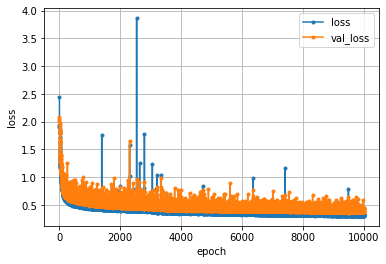

In [8]:
# 学習経過の可視化(大きさ)
loss     = size_history.history['loss']
val_loss = size_history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

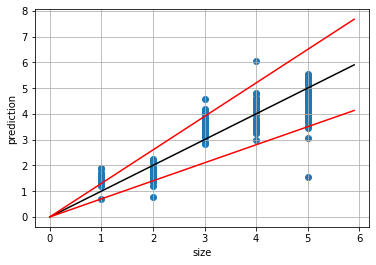

In [9]:
# 散布図表示
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test

plt.scatter(size_answer, size_predict)
plt.xlabel("size")
plt.ylabel("prediction")
plt.grid(True)
## y=xの直線をひく
x = []
for i in range(60):
    x.append(i*0.1)
y = []
for i in range(60):
    y.append(i*0.1)
plt.plot(x, y, color='black')
## 誤差-30%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*0.7)
plt.plot(x, y, color='red')
## 誤差+30%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*1.3)
plt.plot(x, y, color='red')

In [10]:
#大きさごとの推定精度の確認：20%以下
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.058333333333333334
大きさ2の正答率：0.45614035087719296
大きさ3の正答率：0.6568627450980392
大きさ4の正答率：0.9230769230769231
大きさ5の正答率：0.6868686868686869


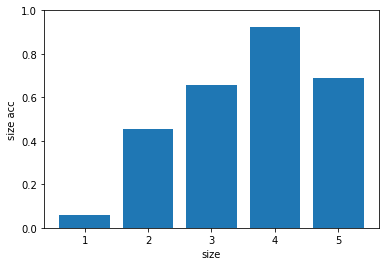

In [11]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [12]:
#大きさごとの推定精度の確認：最も近く予測
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.8083333333333333
大きさ2の正答率：0.7017543859649122
大きさ3の正答率：0.5098039215686274
大きさ4の正答率：0.75
大きさ5の正答率：0.37373737373737376


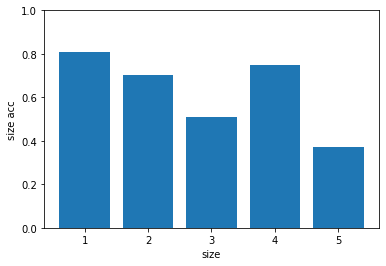

In [13]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [14]:
one_predict = []
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
for i in range(len(size_y_test)):
    if size_answer[i] == 1:
        one_predict.append(size_predict[i][0])
print(one_predict)

[1.44252, 1.1473302, 1.4547509, 1.1462659, 1.279724, 1.4187611, 2.2494783, 1.4151858, 1.5425566, 1.3619479, 1.5114468, 1.3730124, 1.5752915, 1.4545077, 1.3821934, 1.5695113, 1.2814149, 1.4333647, 1.567007, 0.73064697, 1.4592646, 1.4466609, 1.4385337, 1.4378985, 1.4328555, 1.4320906, 0.7976588, 1.4148434, 1.4687041, 1.396653, 1.4211091, 1.3610276, 1.4213666, 1.3046511, 1.4013566, 1.1810225, 1.3877333, 1.4635714, 1.4398497, 1.4356498, 1.4115142, 1.435707, 1.3438138, 1.2059973, 1.4960641, 1.4183291, 1.4417571, 1.4593323, 1.3119601, 1.3960971, 1.4772471, 1.5889014, 1.4211463, 1.4654015, 1.5327939, 1.4758557, 1.3323001, 1.4968585, 1.5920066, 1.5640067, 1.3928717, 1.4473618, 1.6459101, 1.461213, 1.4432524, 0.48839843, 1.4031609, 1.4343623, 1.4961585, 1.5364636, 1.4618129, 1.2368821, 1.4010838, 1.2895831, 1.4371518, 1.4584311, 1.4902104, 1.60155, 1.2386817, 1.3893145, 1.4438361, 1.4162654, 1.4688128, 1.4389266, 1.501458, 1.0119036, 1.5519599, 1.4248704, 1.4687833, 1.4215535, 1.7420453, 1.4437

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1251, 32)     128         input_1[0][0]                    
____________________________________________________________________________________________

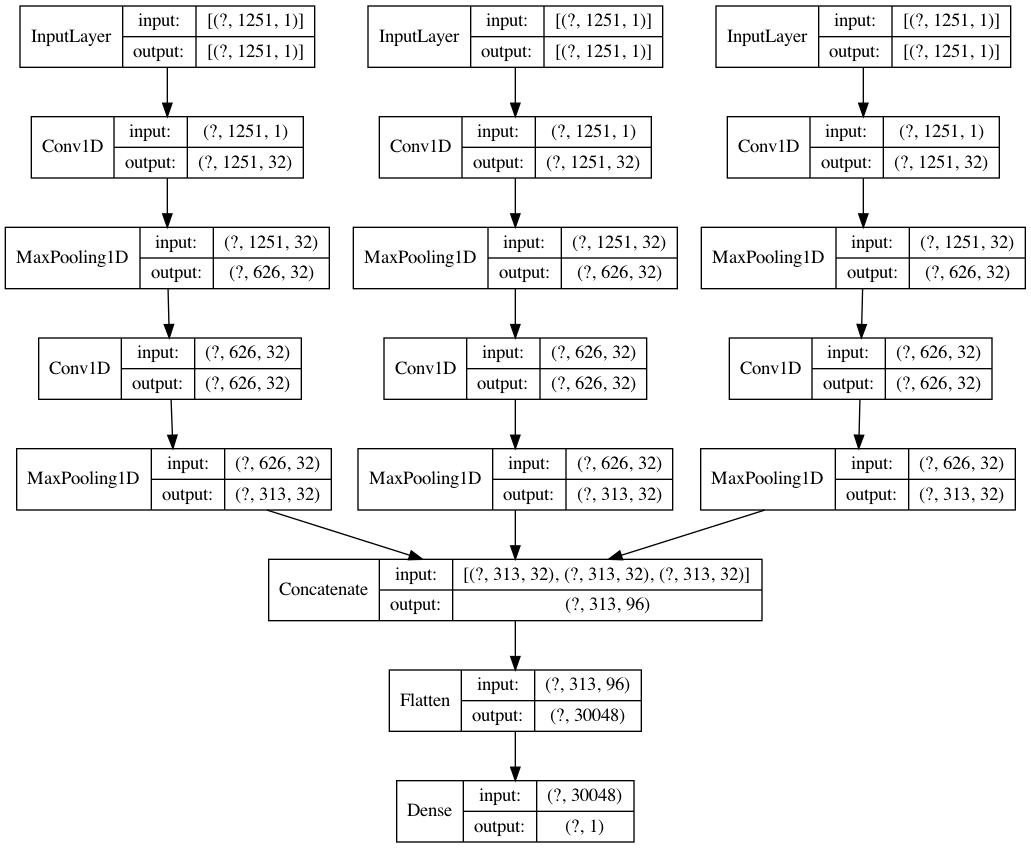

In [4]:
# CNNモデルで大きさ推定(層を増やす)
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,1))
input2 = Input(shape=(1251,1))
input3 = Input(shape=(1251,1))

# 入力1から結合前まで
x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(32, 3, padding='same', activation='tanh')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
y = MaxPooling1D(2, padding='same')(y)
y = Conv1D(32, 3, padding='same', activation='tanh')(y)
y = MaxPooling1D(2, padding='same')(y)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
z = MaxPooling1D(2, padding='same')(z)
z = Conv1D(32, 3, padding='same', activation='tanh')(z)
z = MaxPooling1D(2, padding='same')(z)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
cnn = Flatten()(combined)
cnn = Dense(1, activation="linear")(cnn)

# モデル定義とコンパイル
cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
cnn_size_model.summary()
plot_model(cnn_size_model, show_shapes=True, show_layer_names=False)

In [6]:
size_history = cnn_size_model.fit([size_x_train1, size_x_train2, size_x_train3], size_y_train, epochs=4000, validation_data=([size_x_test1,size_x_test2,size_x_test3], size_y_test))

Epoch 1/4000
68/68 [==============================] - 4s 64ms/step - loss: 1.9712 - acc: 0.2172 - val_loss: 1.9494 - val_acc: 0.2004
Epoch 2/4000
68/68 [==============================] - 4s 60ms/step - loss: 1.9611 - acc: 0.2172 - val_loss: 1.9221 - val_acc: 0.2004
Epoch 3/4000
68/68 [==============================] - 4s 60ms/step - loss: 1.9368 - acc: 0.2172 - val_loss: 1.8511 - val_acc: 0.2004
Epoch 4/4000
68/68 [==============================] - 4s 62ms/step - loss: 1.8238 - acc: 0.2172 - val_loss: 1.7745 - val_acc: 0.2004
Epoch 5/4000
68/68 [==============================] - 4s 61ms/step - loss: 1.7258 - acc: 0.2172 - val_loss: 1.7579 - val_acc: 0.2004
Epoch 6/4000
68/68 [==============================] - 4s 64ms/step - loss: 1.7605 - acc: 0.2172 - val_loss: 1.9649 - val_acc: 0.2004
Epoch 7/4000
68/68 [==============================] - 4s 62ms/step - loss: 1.7141 - acc: 0.2172 - val_loss: 1.7147 - val_acc: 0.2004
Epoch 8/4000
68/68 [==============================] - 5s 67ms/step - 

68/68 [==============================] - 4s 63ms/step - loss: 0.9350 - acc: 0.2162 - val_loss: 0.9978 - val_acc: 0.2004
Epoch 124/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.8806 - acc: 0.2162 - val_loss: 0.8940 - val_acc: 0.2004
Epoch 125/4000
68/68 [==============================] - 4s 65ms/step - loss: 1.1510 - acc: 0.2167 - val_loss: 0.8955 - val_acc: 0.2004
Epoch 126/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.7568 - acc: 0.2167 - val_loss: 0.9166 - val_acc: 0.2004
Epoch 127/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.7135 - acc: 0.2167 - val_loss: 0.8179 - val_acc: 0.2004
Epoch 128/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.6569 - acc: 0.2162 - val_loss: 0.9375 - val_acc: 0.2004
Epoch 129/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.6703 - acc: 0.2162 - val_loss: 0.8611 - val_acc: 0.2004
Epoch 130/4000
68/68 [==============================] - 4s 64ms/step -

Epoch 184/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5378 - acc: 0.2148 - val_loss: 0.8351 - val_acc: 0.2004
Epoch 185/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.5264 - acc: 0.2153 - val_loss: 0.7978 - val_acc: 0.2004
Epoch 186/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5612 - acc: 0.2153 - val_loss: 0.7622 - val_acc: 0.2004
Epoch 187/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5767 - acc: 0.2153 - val_loss: 1.0635 - val_acc: 0.1985
Epoch 188/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.5889 - acc: 0.2144 - val_loss: 0.7787 - val_acc: 0.2004
Epoch 189/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.5276 - acc: 0.2158 - val_loss: 0.7650 - val_acc: 0.2004
Epoch 190/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5279 - acc: 0.2148 - val_loss: 0.8949 - val_acc: 0.2004
Epoch 191/4000
68/68 [==============================] -

Epoch 245/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4798 - acc: 0.2153 - val_loss: 0.7586 - val_acc: 0.2004
Epoch 246/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4772 - acc: 0.2148 - val_loss: 0.8943 - val_acc: 0.2004
Epoch 247/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.4892 - acc: 0.2144 - val_loss: 0.7604 - val_acc: 0.2004
Epoch 248/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4726 - acc: 0.2148 - val_loss: 0.8495 - val_acc: 0.2004
Epoch 249/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.4654 - acc: 0.2148 - val_loss: 0.7805 - val_acc: 0.2004
Epoch 250/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4567 - acc: 0.2148 - val_loss: 0.9075 - val_acc: 0.2004
Epoch 251/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5014 - acc: 0.2148 - val_loss: 0.8294 - val_acc: 0.2004
Epoch 252/4000
68/68 [==============================] -

Epoch 306/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4309 - acc: 0.2144 - val_loss: 0.7286 - val_acc: 0.2004
Epoch 307/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4953 - acc: 0.2144 - val_loss: 0.8158 - val_acc: 0.2004
Epoch 308/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.4859 - acc: 0.2139 - val_loss: 0.8647 - val_acc: 0.1985
Epoch 309/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4352 - acc: 0.2144 - val_loss: 0.8145 - val_acc: 0.2004
Epoch 310/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4316 - acc: 0.2144 - val_loss: 0.8731 - val_acc: 0.2004
Epoch 311/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.4249 - acc: 0.2148 - val_loss: 0.8800 - val_acc: 0.2004
Epoch 312/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.4374 - acc: 0.2153 - val_loss: 0.8427 - val_acc: 0.2004
Epoch 313/4000
68/68 [==============================] -

Epoch 367/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.4217 - acc: 0.2139 - val_loss: 0.7729 - val_acc: 0.2004
Epoch 368/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3804 - acc: 0.2144 - val_loss: 0.7984 - val_acc: 0.2004
Epoch 369/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.4038 - acc: 0.2148 - val_loss: 0.7856 - val_acc: 0.2004
Epoch 370/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3857 - acc: 0.2153 - val_loss: 0.8648 - val_acc: 0.2004
Epoch 371/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4260 - acc: 0.2148 - val_loss: 0.9972 - val_acc: 0.2004
Epoch 372/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4525 - acc: 0.2135 - val_loss: 0.8863 - val_acc: 0.2004
Epoch 373/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4089 - acc: 0.2144 - val_loss: 0.8392 - val_acc: 0.2004
Epoch 374/4000
68/68 [==============================] -

Epoch 428/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3606 - acc: 0.2139 - val_loss: 0.9401 - val_acc: 0.1985
Epoch 429/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4619 - acc: 0.2144 - val_loss: 0.8976 - val_acc: 0.2004
Epoch 430/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.6286 - acc: 0.2144 - val_loss: 0.8928 - val_acc: 0.1985
Epoch 431/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.9151 - acc: 0.2139 - val_loss: 1.3437 - val_acc: 0.2004
Epoch 432/4000
68/68 [==============================] - 4s 58ms/step - loss: 1.1105 - acc: 0.2107 - val_loss: 0.8755 - val_acc: 0.2004
Epoch 433/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.5649 - acc: 0.2162 - val_loss: 0.9790 - val_acc: 0.2004
Epoch 434/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.6566 - acc: 0.2144 - val_loss: 1.0227 - val_acc: 0.2004
Epoch 435/4000
68/68 [==============================] -

Epoch 489/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3539 - acc: 0.2148 - val_loss: 0.7684 - val_acc: 0.1985
Epoch 490/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3750 - acc: 0.2148 - val_loss: 0.8512 - val_acc: 0.1985
Epoch 491/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3476 - acc: 0.2153 - val_loss: 0.7866 - val_acc: 0.1985
Epoch 492/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4326 - acc: 0.2135 - val_loss: 0.8629 - val_acc: 0.1985
Epoch 493/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3611 - acc: 0.2153 - val_loss: 0.7509 - val_acc: 0.2004
Epoch 494/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3377 - acc: 0.2148 - val_loss: 0.8514 - val_acc: 0.2004
Epoch 495/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3370 - acc: 0.2139 - val_loss: 0.8107 - val_acc: 0.1985
Epoch 496/4000
68/68 [==============================] -

Epoch 550/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3313 - acc: 0.2153 - val_loss: 0.7517 - val_acc: 0.2004
Epoch 551/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3240 - acc: 0.2139 - val_loss: 0.7899 - val_acc: 0.2004
Epoch 552/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3576 - acc: 0.2148 - val_loss: 0.9727 - val_acc: 0.1985
Epoch 553/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3194 - acc: 0.2158 - val_loss: 0.7633 - val_acc: 0.1985
Epoch 554/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3238 - acc: 0.2148 - val_loss: 0.7573 - val_acc: 0.2004
Epoch 555/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3322 - acc: 0.2153 - val_loss: 0.7606 - val_acc: 0.2004
Epoch 556/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3450 - acc: 0.2158 - val_loss: 0.9342 - val_acc: 0.1985
Epoch 557/4000
68/68 [==============================] -

Epoch 611/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3410 - acc: 0.2158 - val_loss: 0.7547 - val_acc: 0.1985
Epoch 612/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3092 - acc: 0.2153 - val_loss: 0.7789 - val_acc: 0.2004
Epoch 613/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3257 - acc: 0.2148 - val_loss: 0.7028 - val_acc: 0.2004
Epoch 614/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3228 - acc: 0.2158 - val_loss: 0.8936 - val_acc: 0.1985
Epoch 615/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3650 - acc: 0.2153 - val_loss: 0.8534 - val_acc: 0.2004
Epoch 616/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3546 - acc: 0.2153 - val_loss: 0.7420 - val_acc: 0.1985
Epoch 617/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3253 - acc: 0.2153 - val_loss: 0.8569 - val_acc: 0.1985
Epoch 618/4000
68/68 [==============================] -

Epoch 672/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3705 - acc: 0.2162 - val_loss: 0.6732 - val_acc: 0.2004
Epoch 673/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3189 - acc: 0.2148 - val_loss: 0.7796 - val_acc: 0.2004
Epoch 674/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3402 - acc: 0.2158 - val_loss: 0.7041 - val_acc: 0.2004
Epoch 675/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3258 - acc: 0.2153 - val_loss: 0.7779 - val_acc: 0.2004
Epoch 676/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3193 - acc: 0.2153 - val_loss: 0.7088 - val_acc: 0.1985
Epoch 677/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3143 - acc: 0.2153 - val_loss: 0.7358 - val_acc: 0.2004
Epoch 678/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.3069 - acc: 0.2158 - val_loss: 0.7660 - val_acc: 0.1985
Epoch 679/4000
68/68 [==============================] -

Epoch 733/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3090 - acc: 0.2158 - val_loss: 0.7644 - val_acc: 0.2004
Epoch 734/4000
68/68 [==============================] - 4s 57ms/step - loss: 0.3384 - acc: 0.2148 - val_loss: 1.0691 - val_acc: 0.1985
Epoch 735/4000
68/68 [==============================] - 4s 57ms/step - loss: 0.3348 - acc: 0.2158 - val_loss: 0.7171 - val_acc: 0.2004
Epoch 736/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3426 - acc: 0.2153 - val_loss: 0.8987 - val_acc: 0.2004
Epoch 737/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3562 - acc: 0.2153 - val_loss: 0.9226 - val_acc: 0.2004
Epoch 738/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3054 - acc: 0.2148 - val_loss: 0.8766 - val_acc: 0.1985
Epoch 739/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3021 - acc: 0.2153 - val_loss: 0.7801 - val_acc: 0.1985
Epoch 740/4000
68/68 [==============================] -

Epoch 794/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2965 - acc: 0.2153 - val_loss: 0.7198 - val_acc: 0.2004
Epoch 795/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2968 - acc: 0.2158 - val_loss: 0.6961 - val_acc: 0.1985
Epoch 796/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2869 - acc: 0.2158 - val_loss: 0.7834 - val_acc: 0.1985
Epoch 797/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3126 - acc: 0.2153 - val_loss: 0.7205 - val_acc: 0.2004
Epoch 798/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3011 - acc: 0.2144 - val_loss: 0.7047 - val_acc: 0.2004
Epoch 799/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2932 - acc: 0.2153 - val_loss: 0.7418 - val_acc: 0.2004
Epoch 800/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2972 - acc: 0.2158 - val_loss: 0.7447 - val_acc: 0.1985
Epoch 801/4000
68/68 [==============================] -

Epoch 855/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2871 - acc: 0.2162 - val_loss: 0.6674 - val_acc: 0.1985
Epoch 856/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2902 - acc: 0.2162 - val_loss: 0.7628 - val_acc: 0.2004
Epoch 857/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3322 - acc: 0.2162 - val_loss: 0.8319 - val_acc: 0.2004
Epoch 858/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3039 - acc: 0.2153 - val_loss: 0.7401 - val_acc: 0.2004
Epoch 859/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3674 - acc: 0.2167 - val_loss: 0.8988 - val_acc: 0.2004
Epoch 860/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3917 - acc: 0.2162 - val_loss: 0.8970 - val_acc: 0.1985
Epoch 861/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.3519 - acc: 0.2148 - val_loss: 0.9967 - val_acc: 0.1985
Epoch 862/4000
68/68 [==============================] -

Epoch 916/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2926 - acc: 0.2162 - val_loss: 0.7996 - val_acc: 0.1985
Epoch 917/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3230 - acc: 0.2158 - val_loss: 0.7123 - val_acc: 0.1985
Epoch 918/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3300 - acc: 0.2153 - val_loss: 0.7136 - val_acc: 0.2004
Epoch 919/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2827 - acc: 0.2172 - val_loss: 0.8212 - val_acc: 0.1985
Epoch 920/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3247 - acc: 0.2153 - val_loss: 0.7307 - val_acc: 0.1985
Epoch 921/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2721 - acc: 0.2162 - val_loss: 0.7241 - val_acc: 0.1985
Epoch 922/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2758 - acc: 0.2162 - val_loss: 0.7126 - val_acc: 0.2004
Epoch 923/4000
68/68 [==============================] -

Epoch 977/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3455 - acc: 0.2153 - val_loss: 0.7059 - val_acc: 0.2004
Epoch 978/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.2837 - acc: 0.2158 - val_loss: 0.7397 - val_acc: 0.1985
Epoch 979/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3269 - acc: 0.2153 - val_loss: 0.9396 - val_acc: 0.1985
Epoch 980/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3137 - acc: 0.2153 - val_loss: 0.7299 - val_acc: 0.1985
Epoch 981/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3387 - acc: 0.2148 - val_loss: 0.7002 - val_acc: 0.2004
Epoch 982/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2752 - acc: 0.2153 - val_loss: 0.6693 - val_acc: 0.2004
Epoch 983/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2815 - acc: 0.2158 - val_loss: 0.7077 - val_acc: 0.2004
Epoch 984/4000
68/68 [==============================] -

68/68 [==============================] - 5s 66ms/step - loss: 0.2621 - acc: 0.2153 - val_loss: 0.7311 - val_acc: 0.2004
Epoch 1098/4000
68/68 [==============================] - 4s 66ms/step - loss: 0.3012 - acc: 0.2153 - val_loss: 0.6467 - val_acc: 0.2004
Epoch 1099/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3063 - acc: 0.2162 - val_loss: 0.6466 - val_acc: 0.1985
Epoch 1100/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3796 - acc: 0.2135 - val_loss: 0.7256 - val_acc: 0.2004
Epoch 1101/4000
68/68 [==============================] - 5s 73ms/step - loss: 0.3730 - acc: 0.2162 - val_loss: 0.6778 - val_acc: 0.2004
Epoch 1102/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2862 - acc: 0.2162 - val_loss: 0.6877 - val_acc: 0.1985
Epoch 1103/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2916 - acc: 0.2158 - val_loss: 0.6939 - val_acc: 0.2004
Epoch 1104/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 61ms/step - loss: 0.2546 - acc: 0.2158 - val_loss: 0.6244 - val_acc: 0.2004
Epoch 1218/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2660 - acc: 0.2153 - val_loss: 0.6621 - val_acc: 0.1985
Epoch 1219/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2654 - acc: 0.2162 - val_loss: 0.6355 - val_acc: 0.1985
Epoch 1220/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2930 - acc: 0.2158 - val_loss: 0.7066 - val_acc: 0.2004
Epoch 1221/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2661 - acc: 0.2158 - val_loss: 0.6343 - val_acc: 0.2004
Epoch 1222/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2704 - acc: 0.2167 - val_loss: 0.7254 - val_acc: 0.2004
Epoch 1223/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2711 - acc: 0.2148 - val_loss: 0.7438 - val_acc: 0.1985
Epoch 1224/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 61ms/step - loss: 0.2889 - acc: 0.2148 - val_loss: 0.6464 - val_acc: 0.2004
Epoch 1338/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2873 - acc: 0.2135 - val_loss: 0.6611 - val_acc: 0.2004
Epoch 1339/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2538 - acc: 0.2162 - val_loss: 0.8750 - val_acc: 0.2004
Epoch 1340/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2451 - acc: 0.2167 - val_loss: 0.6886 - val_acc: 0.2004
Epoch 1341/4000
68/68 [==============================] - 5s 69ms/step - loss: 0.2547 - acc: 0.2158 - val_loss: 0.6394 - val_acc: 0.2004
Epoch 1342/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.2457 - acc: 0.2167 - val_loss: 0.7524 - val_acc: 0.1985
Epoch 1343/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2464 - acc: 0.2158 - val_loss: 0.6347 - val_acc: 0.1985
Epoch 1344/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2371 - acc: 0.2158 - val_loss: 0.6661 - val_acc: 0.2004
Epoch 1458/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2319 - acc: 0.2153 - val_loss: 0.6146 - val_acc: 0.2004
Epoch 1459/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2334 - acc: 0.2162 - val_loss: 0.6307 - val_acc: 0.2004
Epoch 1460/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2437 - acc: 0.2162 - val_loss: 0.8556 - val_acc: 0.1985
Epoch 1461/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2526 - acc: 0.2158 - val_loss: 0.7629 - val_acc: 0.1985
Epoch 1462/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2520 - acc: 0.2158 - val_loss: 0.6719 - val_acc: 0.2004
Epoch 1463/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2862 - acc: 0.2144 - val_loss: 0.6491 - val_acc: 0.2004
Epoch 1464/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 61ms/step - loss: 0.2836 - acc: 0.2158 - val_loss: 0.5991 - val_acc: 0.2004
Epoch 1578/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2340 - acc: 0.2158 - val_loss: 0.6419 - val_acc: 0.2004
Epoch 1579/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2314 - acc: 0.2158 - val_loss: 0.6564 - val_acc: 0.1985
Epoch 1580/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2353 - acc: 0.2153 - val_loss: 0.6312 - val_acc: 0.1985
Epoch 1581/4000
68/68 [==============================] - 5s 67ms/step - loss: 0.2329 - acc: 0.2167 - val_loss: 0.6396 - val_acc: 0.1985
Epoch 1582/4000
68/68 [==============================] - 5s 67ms/step - loss: 0.2220 - acc: 0.2158 - val_loss: 0.6846 - val_acc: 0.2004
Epoch 1583/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2416 - acc: 0.2158 - val_loss: 0.6275 - val_acc: 0.2004
Epoch 1584/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 60ms/step - loss: 0.2505 - acc: 0.2158 - val_loss: 0.6218 - val_acc: 0.1985
Epoch 1698/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2229 - acc: 0.2153 - val_loss: 0.6149 - val_acc: 0.2004
Epoch 1699/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2308 - acc: 0.2172 - val_loss: 0.6093 - val_acc: 0.2004
Epoch 1700/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2286 - acc: 0.2167 - val_loss: 0.7240 - val_acc: 0.1985
Epoch 1701/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2484 - acc: 0.2162 - val_loss: 0.6259 - val_acc: 0.2004
Epoch 1702/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2308 - acc: 0.2158 - val_loss: 0.6762 - val_acc: 0.2004
Epoch 1703/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2782 - acc: 0.2144 - val_loss: 0.6094 - val_acc: 0.2004
Epoch 1704/4000
68/68 [==============================] - 4s 62ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2259 - acc: 0.2158 - val_loss: 0.6479 - val_acc: 0.1985
Epoch 1818/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2224 - acc: 0.2153 - val_loss: 0.7493 - val_acc: 0.1985
Epoch 1819/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2430 - acc: 0.2162 - val_loss: 0.6115 - val_acc: 0.1985
Epoch 1820/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2417 - acc: 0.2144 - val_loss: 0.6371 - val_acc: 0.2004
Epoch 1821/4000
68/68 [==============================] - 5s 68ms/step - loss: 0.2255 - acc: 0.2158 - val_loss: 0.7031 - val_acc: 0.1985
Epoch 1822/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.2450 - acc: 0.2167 - val_loss: 0.6470 - val_acc: 0.2004
Epoch 1823/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2179 - acc: 0.2158 - val_loss: 0.6592 - val_acc: 0.1985
Epoch 1824/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2110 - acc: 0.2162 - val_loss: 0.5694 - val_acc: 0.2004
Epoch 1938/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.2552 - acc: 0.2162 - val_loss: 0.6112 - val_acc: 0.2004
Epoch 1939/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.2415 - acc: 0.2153 - val_loss: 0.6000 - val_acc: 0.2004
Epoch 1940/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2470 - acc: 0.2148 - val_loss: 0.6405 - val_acc: 0.2004
Epoch 1941/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2201 - acc: 0.2162 - val_loss: 0.6180 - val_acc: 0.2004
Epoch 1942/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2100 - acc: 0.2162 - val_loss: 0.5761 - val_acc: 0.2004
Epoch 1943/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2078 - acc: 0.2153 - val_loss: 0.6256 - val_acc: 0.2004
Epoch 1944/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2102 - acc: 0.2158 - val_loss: 0.6091 - val_acc: 0.2004
Epoch 2058/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2150 - acc: 0.2158 - val_loss: 0.6272 - val_acc: 0.1985
Epoch 2059/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2199 - acc: 0.2158 - val_loss: 0.6360 - val_acc: 0.1985
Epoch 2060/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2371 - acc: 0.2144 - val_loss: 0.6829 - val_acc: 0.2004
Epoch 2061/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2174 - acc: 0.2153 - val_loss: 0.6705 - val_acc: 0.2004
Epoch 2062/4000
68/68 [==============================] - 5s 72ms/step - loss: 0.2274 - acc: 0.2162 - val_loss: 0.5695 - val_acc: 0.2004
Epoch 2063/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2199 - acc: 0.2158 - val_loss: 0.6186 - val_acc: 0.2004
Epoch 2064/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2203 - acc: 0.2148 - val_loss: 0.6296 - val_acc: 0.1985
Epoch 2178/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2324 - acc: 0.2148 - val_loss: 0.5953 - val_acc: 0.2004
Epoch 2179/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2181 - acc: 0.2153 - val_loss: 0.5880 - val_acc: 0.2004
Epoch 2180/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2025 - acc: 0.2162 - val_loss: 0.6594 - val_acc: 0.2004
Epoch 2181/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2006 - acc: 0.2144 - val_loss: 0.6377 - val_acc: 0.1985
Epoch 2182/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2045 - acc: 0.2158 - val_loss: 0.6050 - val_acc: 0.2004
Epoch 2183/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2303 - acc: 0.2158 - val_loss: 0.6516 - val_acc: 0.1985
Epoch 2184/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2081 - acc: 0.2167 - val_loss: 0.5771 - val_acc: 0.2004
Epoch 2298/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2025 - acc: 0.2162 - val_loss: 0.6465 - val_acc: 0.1985
Epoch 2299/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1954 - acc: 0.2162 - val_loss: 0.6154 - val_acc: 0.2004
Epoch 2300/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1844 - acc: 0.2167 - val_loss: 0.5989 - val_acc: 0.2004
Epoch 2301/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1894 - acc: 0.2158 - val_loss: 0.5766 - val_acc: 0.2004
Epoch 2302/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.1910 - acc: 0.2162 - val_loss: 0.6329 - val_acc: 0.2004
Epoch 2303/4000
68/68 [==============================] - 5s 72ms/step - loss: 0.1984 - acc: 0.2158 - val_loss: 0.6478 - val_acc: 0.2004
Epoch 2304/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 62ms/step - loss: 0.1981 - acc: 0.2153 - val_loss: 0.6188 - val_acc: 0.2004
Epoch 2418/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1896 - acc: 0.2153 - val_loss: 0.6776 - val_acc: 0.2004
Epoch 2419/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2138 - acc: 0.2158 - val_loss: 0.6692 - val_acc: 0.2004
Epoch 2420/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2021 - acc: 0.2153 - val_loss: 0.5929 - val_acc: 0.1985
Epoch 2421/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2000 - acc: 0.2158 - val_loss: 0.6061 - val_acc: 0.2004
Epoch 2422/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2039 - acc: 0.2162 - val_loss: 0.6425 - val_acc: 0.1985
Epoch 2423/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2187 - acc: 0.2162 - val_loss: 0.6341 - val_acc: 0.2004
Epoch 2424/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 58ms/step - loss: 0.1846 - acc: 0.2158 - val_loss: 0.5628 - val_acc: 0.2004
Epoch 2538/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2093 - acc: 0.2148 - val_loss: 0.5939 - val_acc: 0.2004
Epoch 2539/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2344 - acc: 0.2153 - val_loss: 0.9031 - val_acc: 0.1911
Epoch 2540/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2216 - acc: 0.2153 - val_loss: 0.6043 - val_acc: 0.2004
Epoch 2541/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2013 - acc: 0.2153 - val_loss: 0.6289 - val_acc: 0.1985
Epoch 2542/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2127 - acc: 0.2153 - val_loss: 0.7520 - val_acc: 0.2004
Epoch 2543/4000
68/68 [==============================] - 5s 68ms/step - loss: 0.2087 - acc: 0.2158 - val_loss: 0.5826 - val_acc: 0.2004
Epoch 2544/4000
68/68 [==============================] - 4s 65ms

68/68 [==============================] - 4s 60ms/step - loss: 0.1894 - acc: 0.2158 - val_loss: 0.5767 - val_acc: 0.2004
Epoch 2658/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1928 - acc: 0.2153 - val_loss: 0.5269 - val_acc: 0.2004
Epoch 2659/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2158 - acc: 0.2153 - val_loss: 0.5666 - val_acc: 0.2004
Epoch 2660/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1932 - acc: 0.2167 - val_loss: 0.5805 - val_acc: 0.2004
Epoch 2661/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1839 - acc: 0.2158 - val_loss: 0.6594 - val_acc: 0.2004
Epoch 2662/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1867 - acc: 0.2158 - val_loss: 0.5512 - val_acc: 0.2004
Epoch 2663/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1785 - acc: 0.2153 - val_loss: 0.5465 - val_acc: 0.2004
Epoch 2664/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2291 - acc: 0.2158 - val_loss: 0.6078 - val_acc: 0.2004
Epoch 2778/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1938 - acc: 0.2153 - val_loss: 0.6449 - val_acc: 0.1985
Epoch 2779/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2021 - acc: 0.2167 - val_loss: 0.6201 - val_acc: 0.2004
Epoch 2780/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1885 - acc: 0.2153 - val_loss: 0.6416 - val_acc: 0.2004
Epoch 2781/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2142 - acc: 0.2158 - val_loss: 0.6182 - val_acc: 0.2004
Epoch 2782/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1918 - acc: 0.2148 - val_loss: 0.5995 - val_acc: 0.2004
Epoch 2783/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.4878 - acc: 0.2158 - val_loss: 0.7940 - val_acc: 0.2004
Epoch 2784/4000
68/68 [==============================] - 4s 61ms

68/68 [==============================] - 4s 58ms/step - loss: 0.1781 - acc: 0.2167 - val_loss: 0.5936 - val_acc: 0.1985
Epoch 2898/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1836 - acc: 0.2153 - val_loss: 0.6207 - val_acc: 0.1985
Epoch 2899/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1931 - acc: 0.2162 - val_loss: 0.6323 - val_acc: 0.2004
Epoch 2900/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2120 - acc: 0.2162 - val_loss: 0.5860 - val_acc: 0.2004
Epoch 2901/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2048 - acc: 0.2153 - val_loss: 0.5910 - val_acc: 0.2004
Epoch 2902/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2463 - acc: 0.2153 - val_loss: 0.5859 - val_acc: 0.1985
Epoch 2903/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1969 - acc: 0.2148 - val_loss: 0.5760 - val_acc: 0.2004
Epoch 2904/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 58ms/step - loss: 0.1842 - acc: 0.2158 - val_loss: 0.6082 - val_acc: 0.2004
Epoch 3018/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1755 - acc: 0.2153 - val_loss: 0.6470 - val_acc: 0.2004
Epoch 3019/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1836 - acc: 0.2158 - val_loss: 0.5850 - val_acc: 0.2004
Epoch 3020/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1858 - acc: 0.2144 - val_loss: 0.5954 - val_acc: 0.2004
Epoch 3021/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1789 - acc: 0.2162 - val_loss: 0.5944 - val_acc: 0.1985
Epoch 3022/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1861 - acc: 0.2158 - val_loss: 0.5791 - val_acc: 0.2004
Epoch 3023/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1947 - acc: 0.2158 - val_loss: 0.5832 - val_acc: 0.2004
Epoch 3024/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 60ms/step - loss: 0.2102 - acc: 0.2148 - val_loss: 0.5895 - val_acc: 0.2004
Epoch 3138/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3781 - acc: 0.2158 - val_loss: 0.7318 - val_acc: 0.1985
Epoch 3139/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2093 - acc: 0.2139 - val_loss: 0.6347 - val_acc: 0.1985
Epoch 3140/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1785 - acc: 0.2153 - val_loss: 0.5854 - val_acc: 0.2004
Epoch 3141/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1767 - acc: 0.2153 - val_loss: 0.5951 - val_acc: 0.2004
Epoch 3142/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1801 - acc: 0.2162 - val_loss: 0.5869 - val_acc: 0.2004
Epoch 3143/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1865 - acc: 0.2162 - val_loss: 0.5861 - val_acc: 0.2004
Epoch 3144/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.1841 - acc: 0.2167 - val_loss: 0.5899 - val_acc: 0.2004
Epoch 3258/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1736 - acc: 0.2158 - val_loss: 0.6185 - val_acc: 0.2004
Epoch 3259/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1693 - acc: 0.2158 - val_loss: 0.6135 - val_acc: 0.2004
Epoch 3260/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1782 - acc: 0.2148 - val_loss: 0.5912 - val_acc: 0.2004
Epoch 3261/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1804 - acc: 0.2153 - val_loss: 0.5992 - val_acc: 0.2004
Epoch 3262/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1903 - acc: 0.2153 - val_loss: 0.6438 - val_acc: 0.1967
Epoch 3263/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1782 - acc: 0.2162 - val_loss: 0.6925 - val_acc: 0.2004
Epoch 3264/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 61ms/step - loss: 0.1766 - acc: 0.2148 - val_loss: 0.6003 - val_acc: 0.2004
Epoch 3378/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1815 - acc: 0.2158 - val_loss: 0.6054 - val_acc: 0.2004
Epoch 3379/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2482 - acc: 0.2153 - val_loss: 0.5940 - val_acc: 0.2004
Epoch 3380/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1730 - acc: 0.2148 - val_loss: 0.8014 - val_acc: 0.2004
Epoch 3381/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1941 - acc: 0.2162 - val_loss: 0.6004 - val_acc: 0.2004
Epoch 3382/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1924 - acc: 0.2153 - val_loss: 0.7244 - val_acc: 0.1967
Epoch 3383/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1890 - acc: 0.2153 - val_loss: 0.6764 - val_acc: 0.2004
Epoch 3384/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 61ms/step - loss: 0.1740 - acc: 0.2162 - val_loss: 0.6386 - val_acc: 0.2004
Epoch 3498/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1951 - acc: 0.2153 - val_loss: 0.5768 - val_acc: 0.2004
Epoch 3499/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2399 - acc: 0.2144 - val_loss: 0.7164 - val_acc: 0.2004
Epoch 3500/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2691 - acc: 0.2158 - val_loss: 0.6365 - val_acc: 0.2004
Epoch 3501/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3030 - acc: 0.2153 - val_loss: 0.7657 - val_acc: 0.2004
Epoch 3502/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3142 - acc: 0.2139 - val_loss: 0.9864 - val_acc: 0.1948
Epoch 3503/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2775 - acc: 0.2153 - val_loss: 0.5902 - val_acc: 0.2004
Epoch 3504/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 59ms/step - loss: 0.1758 - acc: 0.2162 - val_loss: 0.6884 - val_acc: 0.2004
Epoch 3618/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1772 - acc: 0.2153 - val_loss: 0.6577 - val_acc: 0.2004
Epoch 3619/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1730 - acc: 0.2158 - val_loss: 0.7423 - val_acc: 0.2004
Epoch 3620/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1742 - acc: 0.2162 - val_loss: 0.6068 - val_acc: 0.2004
Epoch 3621/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1808 - acc: 0.2148 - val_loss: 0.6381 - val_acc: 0.2004
Epoch 3622/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1711 - acc: 0.2162 - val_loss: 0.6475 - val_acc: 0.2004
Epoch 3623/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1679 - acc: 0.2148 - val_loss: 0.6493 - val_acc: 0.2004
Epoch 3624/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 61ms/step - loss: 0.1768 - acc: 0.2162 - val_loss: 0.8989 - val_acc: 0.2004
Epoch 3738/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1812 - acc: 0.2153 - val_loss: 0.6063 - val_acc: 0.2004
Epoch 3739/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1663 - acc: 0.2162 - val_loss: 0.6822 - val_acc: 0.1985
Epoch 3740/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1686 - acc: 0.2153 - val_loss: 0.6823 - val_acc: 0.2004
Epoch 3741/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2720 - acc: 0.2130 - val_loss: 0.6277 - val_acc: 0.2004
Epoch 3742/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1950 - acc: 0.2162 - val_loss: 0.6312 - val_acc: 0.2004
Epoch 3743/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1763 - acc: 0.2158 - val_loss: 0.6446 - val_acc: 0.2004
Epoch 3744/4000
68/68 [==============================] - 4s 65ms

68/68 [==============================] - 4s 60ms/step - loss: 0.1739 - acc: 0.2153 - val_loss: 0.6636 - val_acc: 0.2004
Epoch 3858/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1718 - acc: 0.2158 - val_loss: 0.6705 - val_acc: 0.2004
Epoch 3859/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1872 - acc: 0.2148 - val_loss: 0.6580 - val_acc: 0.2004
Epoch 3860/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1767 - acc: 0.2158 - val_loss: 0.6819 - val_acc: 0.1967
Epoch 3861/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1687 - acc: 0.2153 - val_loss: 0.6682 - val_acc: 0.2004
Epoch 3862/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1647 - acc: 0.2148 - val_loss: 0.7458 - val_acc: 0.1967
Epoch 3863/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1777 - acc: 0.2153 - val_loss: 0.6655 - val_acc: 0.2004
Epoch 3864/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 62ms/step - loss: 0.1846 - acc: 0.2158 - val_loss: 0.6983 - val_acc: 0.1985
Epoch 3978/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2003 - acc: 0.2148 - val_loss: 0.6403 - val_acc: 0.2004
Epoch 3979/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2238 - acc: 0.2144 - val_loss: 0.6153 - val_acc: 0.2004
Epoch 3980/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1890 - acc: 0.2158 - val_loss: 0.6614 - val_acc: 0.2004
Epoch 3981/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2092 - acc: 0.2148 - val_loss: 0.6867 - val_acc: 0.1967
Epoch 3982/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1768 - acc: 0.2162 - val_loss: 0.7751 - val_acc: 0.2004
Epoch 3983/4000
68/68 [==============================] - 4s 66ms/step - loss: 0.3776 - acc: 0.2139 - val_loss: 0.7420 - val_acc: 0.2004
Epoch 3984/4000
68/68 [==============================] - 5s 67ms

In [7]:
# モデルの評価(大きさ)
score = cnn_size_model.evaluate([size_x_test1, size_x_test2, size_x_test3], size_y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

17/17 [==============================] - 0s 17ms/step - loss: 0.7279 - acc: 0.1967
Test loss: 0.7279127240180969
Test accuracy: 0.19666048884391785


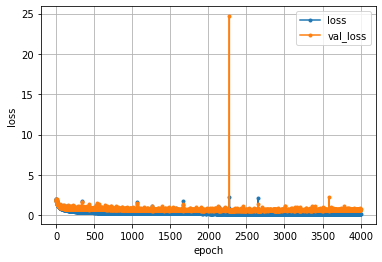

In [8]:
# 学習経過の可視化(大きさ)
loss     = size_history.history['loss']
val_loss = size_history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
#大きさごとの推定精度の確認：20%以下
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.7962962962962963
大きさ2の正答率：0.192
大きさ3の正答率：0.8598130841121495
大きさ4の正答率：0.8
大きさ5の正答率：0.75


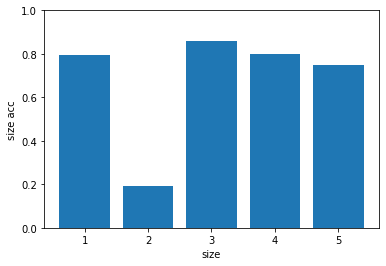

In [10]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [11]:
#大きさごとの推定精度の確認：最も近く予測
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.9351851851851852
大きさ2の正答率：0.312
大きさ3の正答率：0.822429906542056
大きさ4の正答率：0.5684210526315789
大きさ5の正答率：0.4230769230769231


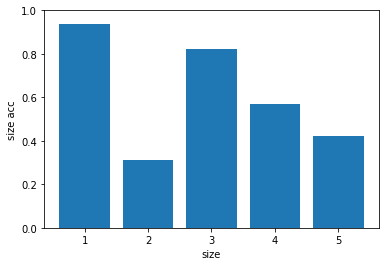

In [12]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [ ]:
1